In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import json

In [2]:
%matplotlib inline

In [3]:
oa_to_parish_lookup = pd.read_csv('../data/OAs_(2021)_to_Civil_Parish_and_Non-Civil_Parished_Areas_to_LTLA_to_UTLA_to_Region_to_Country_(May_2022)_Lookup_in_England_and_Wales.csv')
oa_to_parish_lookup.head()

/var/folders/zs/1hvc18dn7v94z77k1xy7g90c0000gn/T/ipykernel_66122/907054577.py:1: DtypeWarning: Columns (4,7,10,13) have mixed types. Specify dtype option on import or set low_memory=False.
  oa_to_parish_lookup = pd.read_csv('../data/OAs_(2021)_to_Civil_Parish_and_Non-Civil_Parished_Areas_to_LTLA_to_UTLA_to_Region_to_Country_(May_2022)_Lookup_in_England_and_Wales.csv')


ObjectId     OA21CD    PAR22CD        PAR22NM PAR22NMW   LTLA22CD  \
0         1  E00060311  E04000255  Dalton Piercy      NaN  E06000001   
1         2  E00060356  E04000257       Greatham      NaN  E06000001   
2         3  E00060360  E04000257       Greatham      NaN  E06000001   
3         4  E00060357  E04000257       Greatham      NaN  E06000001   
4         5  E00060359  E04000257       Greatham      NaN  E06000001   

     LTLA22NM LTLA22NMW   UTLA22CD    UTLA22NM UTLA22NMW    RGN22CD  \
0  Hartlepool       NaN  E06000001  Hartlepool       NaN  E12000001   
1  Hartlepool       NaN  E06000001  Hartlepool       NaN  E12000001   
2  Hartlepool       NaN  E06000001  Hartlepool       NaN  E12000001   
3  Hartlepool       NaN  E06000001  Hartlepool       NaN  E12000001   
4  Hartlepool       NaN  E06000001  Hartlepool       NaN  E12000001   

      RGN22NM RGN22NMW   CTRY22CD CTRY22NM CTRY22NMW    NAT22CD  \
0  North East      NaN  E92000001  England    Lloegr  K04000001   
1  North East      NaN  E92000001  England    Lloegr  K04000001   
2  North East      NaN  E92000001  England    Lloegr  K04000001   
3  North East      NaN  E92000001  England    Lloegr  K04000001   
4  North East      NaN  E92000001  England    Lloegr  K04000001   

             NAT22NM        NAT22NMW  
0  England and Wales  Cymru a Lloegr  
1  England and Wales  Cymru a Lloegr  
2  England and Wales  Cymru a Lloegr  
3  England and Wales  Cymru a Lloegr  
4  England and Wales  Cymru a Lloegr

In [4]:
oa_to_parish_lookup = oa_to_parish_lookup[[
    'OA21CD',
    'PAR22CD',
    'PAR22NM',
    'RGN22NM'
]]

oa_to_parish_lookup.head()

OA21CD    PAR22CD        PAR22NM     RGN22NM
0  E00060311  E04000255  Dalton Piercy  North East
1  E00060356  E04000257       Greatham  North East
2  E00060360  E04000257       Greatham  North East
3  E00060357  E04000257       Greatham  North East
4  E00060359  E04000257       Greatham  North East

In [5]:
oa_populations = pd.read_csv('../data/census2021-ts001-oa.csv')
oa_populations.head()

date  geography geography code  Residence type: Total; measures: Value  \
0  2021  E00060274      E00060274                                     273   
1  2021  E00060275      E00060275                                     416   
2  2021  E00060276      E00060276                                     259   
3  2021  E00060277      E00060277                                     278   
4  2021  E00060279      E00060279                                     276   

   Residence type: Lives in a household; measures: Value  \
0                                                273       
1                                                416       
2                                                259       
3                                                278       
4                                                276       

   Residence type: Lives in a communal establishment; measures: Value  
0                                                  0                   
1                                                  0                   
2                                                  0                   
3                                                  0                   
4                                                  0

In [6]:
oa_total_frame = oa_to_parish_lookup.merge(
    oa_populations[['geography code', 'Residence type: Total; measures: Value']], 
    how='inner', 
    left_on='OA21CD', 
    right_on='geography code')

oa_total_frame.head()
                    

OA21CD    PAR22CD        PAR22NM     RGN22NM geography code  \
0  E00060311  E04000255  Dalton Piercy  North East      E00060311   
1  E00060356  E04000257       Greatham  North East      E00060356   
2  E00060360  E04000257       Greatham  North East      E00060360   
3  E00060357  E04000257       Greatham  North East      E00060357   
4  E00060359  E04000257       Greatham  North East      E00060359   

   Residence type: Total; measures: Value  
0                                     312  
1                                     283  
2                                     274  
3                                     298  
4                                     274

In [7]:
oa_total_frame = oa_total_frame.rename(columns={'Residence type: Total; measures: Value': 'population'}, errors='raise')
oa_total_frame = oa_total_frame[[
    'OA21CD',
    'PAR22CD',
    'PAR22NM',
    'RGN22NM',
    'population'
]]

oa_total_frame.head()

OA21CD    PAR22CD        PAR22NM     RGN22NM  population
0  E00060311  E04000255  Dalton Piercy  North East         312
1  E00060356  E04000257       Greatham  North East         283
2  E00060360  E04000257       Greatham  North East         274
3  E00060357  E04000257       Greatham  North East         298
4  E00060359  E04000257       Greatham  North East         274

In [8]:
size_frame = pd.read_csv('../geo_data/Output_Areas_Dec_2021_Boundaries_Full_Clipped_EW_BFC_2022_-340120420164038365.csv')
size_frame.head()

OBJECTID     OA21CD   Shape__Area  Shape__Length  \
0         1  E00000001   6707.003326     448.104925   
1         2  E00000003   4186.970726     341.814871   
2         3  E00000005   8736.115654     444.386357   
3         4  E00000007  73494.158020    1607.023365   
4         5  E00000010   2533.057602     259.046872   

                               GlobalID  
0  b6c81a78-d070-4324-a2e9-3522777aca9c  
1  9be984cf-6bdf-470b-bd01-16793c7135f5  
2  6460aa1d-b8b7-4062-a679-354a99d33f73  
3  de2b0475-c5b9-4aec-8804-43e3e21d54e2  
4  55b296f3-e208-41a6-a806-1a020ed907a5

In [9]:
oa_total_frame = oa_total_frame.merge(
    size_frame[['OA21CD', 'Shape__Area']],
    how='inner',
    on='OA21CD'
)
oa_total_frame = oa_total_frame.rename(
    columns={'Shape__Area': 'area'}, 
    errors='raise'
)

In [10]:
oa_total_frame.head()

OA21CD    PAR22CD        PAR22NM     RGN22NM  population          area
0  E00060311  E04000255  Dalton Piercy  North East         312  6.758443e+06
1  E00060356  E04000257       Greatham  North East         283  5.098650e+05
2  E00060360  E04000257       Greatham  North East         274  6.863565e+04
3  E00060357  E04000257       Greatham  North East         298  3.589880e+05
4  E00060359  E04000257       Greatham  North East         274  6.126857e+04

In [11]:
import glob
to_include = list(set(glob.glob('../output_data/all_data_final_updated_*.json')) - set(glob.glob('output_data/all_data_final_updated_errors*.json')))
region_frames = [pd.read_json(i) for i in to_include]
big_df = pd.concat(region_frames)
big_df.shape


(178792, 4)

In [12]:
oa_total_frame = oa_total_frame.merge(
    big_df[['OA21CD', 'amenities']],
    how='left',
    on='OA21CD'
)
oa_total_frame.head()

OA21CD    PAR22CD        PAR22NM     RGN22NM  population          area  \
0  E00060311  E04000255  Dalton Piercy  North East         312  6.758443e+06   
1  E00060356  E04000257       Greatham  North East         283  5.098650e+05   
2  E00060360  E04000257       Greatham  North East         274  6.863565e+04   
3  E00060357  E04000257       Greatham  North East         298  3.589880e+05   
4  E00060359  E04000257       Greatham  North East         274  6.126857e+04   

                                           amenities  
0  [{'name': 'N/A', 'amenity': 'post_box', 'data_...  
1  [{'name': 'The Bull and Dog', 'amenity': 'pub'...  
2                                                 []  
3  [{'name': 'N/A', 'amenity': 'waste_basket', 'd...  
4                                                 []

In [13]:
oa_total_frame.tail()

OA21CD    PAR22CD PAR22NM RGN22NM  population          area  \
188875  W00006941  W04000881  Vaynor   Wales         274  5.605059e+05   
188876  W00006932  W04000881  Vaynor   Wales         303  8.202506e+04   
188877  W00006935  W04000881  Vaynor   Wales         211  6.634248e+04   
188878  W00006940  W04000881  Vaynor   Wales         422  2.768095e+05   
188879  W00006934  W04000881  Vaynor   Wales         293  3.034093e+06   

       amenities  
188875       NaN  
188876       NaN  
188877       NaN  
188878       NaN  
188879       NaN

In [14]:
## drop Wales
drop_wales = oa_total_frame[oa_total_frame.RGN22NM != 'Wales']
drop_wales.shape

(178605, 7)

In [15]:
drop_wales[pd.isnull(drop_wales.amenities)].groupby(['RGN22NM']).size()

Series([], dtype: int64)

In [16]:
oa_to_parish_lookup.groupby(['RGN22NM']).size()

RGN22NM
East Midlands               15393
East of England             19972
London                      26369
North East                   9100
North West                  24050
South East                  28969
South West                  18427
Wales                       10275
West Midlands               18584
Yorkshire and The Humber    17741
dtype: int64

In [17]:
parish_frame = drop_wales[['PAR22CD', 'PAR22NM', 'RGN22NM', 'population', 'area']].groupby(['PAR22CD', 'PAR22NM', 'RGN22NM']).agg('sum').reset_index()
parish_frame.head()

PAR22CD       PAR22NM     RGN22NM  population          area
0  E04000001      Blackrod  North West        5517  8.599134e+06
1  E04000002       Horwich  North West       20908  1.424275e+07
2  E04000003  Westhoughton  North West       25340  1.786415e+07
3  E04000005   Saddleworth  North West       25466  7.613353e+07
4  E04000008       Mossley  North West       11566  8.658747e+06

## Adding on Rural/Urban classification

In [18]:
rural_urban_lookup = pd.read_csv('../data/RUC11_OA11_EW.csv')
rural_urban_lookup.head()

OA11CD RUC11CD                    RUC11 BOUND_CHGIND ASSIGN_CHGIND  \
0  E00000001      A1  Urban major conurbation            U           NaN   
1  E00000003      A1  Urban major conurbation            U           NaN   
2  E00000005      A1  Urban major conurbation            U           NaN   
3  E00000007      A1  Urban major conurbation            U           NaN   
4  E00000010      A1  Urban major conurbation            U           NaN   

  ASSIGN_CHREASON  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN

In [19]:
oa11_oa21_lookup = pd.read_csv('../data/OA_(2011)_to_OA_(2021)_to_Local_Authority_District_(2022)_for_England_and_Wales_Lookup_(Version_2).csv')
oa11_oa21_lookup.head()

/var/folders/zs/1hvc18dn7v94z77k1xy7g90c0000gn/T/ipykernel_66122/421760949.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  oa11_oa21_lookup = pd.read_csv('../data/OA_(2011)_to_OA_(2021)_to_Local_Authority_District_(2022)_for_England_and_Wales_Lookup_(Version_2).csv')


ObjectId     OA11CD     OA21CD CHNGIND    LAD22CD               LAD22NM  \
0         1  E00000124  E00000124       U  E09000002  Barking and Dagenham   
1         2  E00000125  E00000125       U  E09000002  Barking and Dagenham   
2         3  E00000128  E00000128       U  E09000002  Barking and Dagenham   
3         4  E00000129  E00000129       U  E09000002  Barking and Dagenham   
4         5  E00000130  E00000130       U  E09000002  Barking and Dagenham   

  LAD22NMW  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN

In [20]:
rural_urban_lookup = rural_urban_lookup[['OA11CD', 'RUC11CD', 'RUC11']].merge(
    oa11_oa21_lookup[['OA11CD', 'OA21CD']],
    how='left',
    on='OA11CD'
)
rural_urban_lookup.head()

OA11CD RUC11CD                    RUC11     OA21CD
0  E00000001      A1  Urban major conurbation  E00000001
1  E00000003      A1  Urban major conurbation  E00000003
2  E00000005      A1  Urban major conurbation  E00000005
3  E00000007      A1  Urban major conurbation  E00000007
4  E00000010      A1  Urban major conurbation  E00000010

In [21]:
with_rural = drop_wales.merge(
    rural_urban_lookup[[
        'OA21CD',
        'RUC11CD',
        'RUC11'
    ]],
    how='left',
    on='OA21CD'
)

with_rural.head()

OA21CD    PAR22CD        PAR22NM     RGN22NM  population          area  \
0  E00060311  E04000255  Dalton Piercy  North East         312  6.758443e+06   
1  E00060356  E04000257       Greatham  North East         283  5.098650e+05   
2  E00060360  E04000257       Greatham  North East         274  6.863565e+04   
3  E00060357  E04000257       Greatham  North East         298  3.589880e+05   
4  E00060359  E04000257       Greatham  North East         274  6.126857e+04   

                                           amenities RUC11CD  \
0  [{'name': 'N/A', 'amenity': 'post_box', 'data_...      E1   
1  [{'name': 'The Bull and Dog', 'amenity': 'pub'...      C1   
2                                                 []      C1   
3  [{'name': 'N/A', 'amenity': 'waste_basket', 'd...      D1   
4                                                 []      C1   

                   RUC11  
0          Rural village  
1    Urban city and town  
2    Urban city and town  
3  Rural town and fringe  
4    Urban city and town

In [22]:
with_rural.groupby(['RUC11'])[[ 'area']].describe()

area                \
                                                      count          mean   
RUC11                                                                       
Rural hamlets and isolated dwellings                 6055.0  8.612901e+06   
Rural hamlets and isolated dwellings in a spars...    533.0  2.408017e+07   
Rural town and fringe                               15455.0  4.986474e+05   
Rural town and fringe in a sparse setting             677.0  6.755757e+05   
Rural village                                        9442.0  3.594200e+06   
Rural village in a sparse setting                     560.0  7.883246e+06   
Urban city and town                                 77942.0  1.801583e+05   
Urban city and town in a sparse setting               309.0  3.200873e+05   
Urban major conurbation                             61842.0  8.642908e+04   
Urban minor conurbation                              6459.0  1.320435e+05   

                                                                  \
                                                             std   
RUC11                                                              
Rural hamlets and isolated dwellings                8.013448e+06   
Rural hamlets and isolated dwellings in a spars...  2.278767e+07   
Rural town and fringe                               1.271245e+06   
Rural town and fringe in a sparse setting           2.114947e+06   
Rural village                                       4.197805e+06   
Rural village in a sparse setting                   1.212237e+07   
Urban city and town                                 6.126136e+05   
Urban city and town in a sparse setting             1.003697e+06   
Urban major conurbation                             2.138449e+05   
Urban minor conurbation                             2.974184e+05   

                                                                   \
                                                              min   
RUC11                                                               
Rural hamlets and isolated dwellings                  8041.212532   
Rural hamlets and isolated dwellings in a spars...  120146.604691   
Rural town and fringe                                 8176.085709   
Rural town and fringe in a sparse setting            15904.477230   
Rural village                                        12769.463512   
Rural village in a sparse setting                    38411.565811   
Urban city and town                                    290.793518   
Urban city and town in a sparse setting              14198.348251   
Urban major conurbation                                201.248619   
Urban minor conurbation                                  0.039673   

                                                                  \
                                                             25%   
RUC11                                                              
Rural hamlets and isolated dwellings                3.852323e+06   
Rural hamlets and isolated dwellings in a spars...  1.110002e+07   
Rural town and fringe                               6.771172e+04   
Rural town and fringe in a sparse setting           7.333769e+04   
Rural village                                       6.080874e+05   
Rural village in a sparse setting                   1.003910e+06   
Urban city and town                                 4.338182e+04   
Urban city and town in a sparse setting             5.480465e+04   
Urban major conurbation                             2.843624e+04   
Urban minor conurbation                             4.245505e+04   

                                                                  \
                                                             50%   
RUC11                                                              
Rural hamlets and isolated dwellings                7.152737e+06   
Rural hamlets and isolated dwellings in a spars...  1.700971e+07   
Rural town and fringe                        

In [23]:
with_rural[['RUC11', 'RUC11CD']].drop_duplicates()

RUC11 RUC11CD
0                                          Rural village      E1
1                                    Urban city and town      C1
3                                  Rural town and fringe      D1
6                   Rural hamlets and isolated dwellings      F1
10042                            Urban minor conurbation      B1
10978  Rural hamlets and isolated dwellings in a spar...      F2
11072                  Rural village in a sparse setting      E2
11360            Urban city and town in a sparse setting      C2
11413          Rural town and fringe in a sparse setting      D2
20708                            Urban major conurbation      A1

In [24]:
official_rural_list = [
    'D1', 'E1', 'F1', 'D2', 'E2', 'F2'
]

with_rural.head()

OA21CD    PAR22CD        PAR22NM     RGN22NM  population          area  \
0  E00060311  E04000255  Dalton Piercy  North East         312  6.758443e+06   
1  E00060356  E04000257       Greatham  North East         283  5.098650e+05   
2  E00060360  E04000257       Greatham  North East         274  6.863565e+04   
3  E00060357  E04000257       Greatham  North East         298  3.589880e+05   
4  E00060359  E04000257       Greatham  North East         274  6.126857e+04   

                                           amenities RUC11CD  \
0  [{'name': 'N/A', 'amenity': 'post_box', 'data_...      E1   
1  [{'name': 'The Bull and Dog', 'amenity': 'pub'...      C1   
2                                                 []      C1   
3  [{'name': 'N/A', 'amenity': 'waste_basket', 'd...      D1   
4                                                 []      C1   

                   RUC11  
0          Rural village  
1    Urban city and town  
2    Urban city and town  
3  Rural town and fringe  
4    Urban city and town

In [25]:
with_rural['is_rural'] = with_rural.RUC11CD.isin(official_rural_list)
with_rural.head()

OA21CD    PAR22CD        PAR22NM     RGN22NM  population          area  \
0  E00060311  E04000255  Dalton Piercy  North East         312  6.758443e+06   
1  E00060356  E04000257       Greatham  North East         283  5.098650e+05   
2  E00060360  E04000257       Greatham  North East         274  6.863565e+04   
3  E00060357  E04000257       Greatham  North East         298  3.589880e+05   
4  E00060359  E04000257       Greatham  North East         274  6.126857e+04   

                                           amenities RUC11CD  \
0  [{'name': 'N/A', 'amenity': 'post_box', 'data_...      E1   
1  [{'name': 'The Bull and Dog', 'amenity': 'pub'...      C1   
2                                                 []      C1   
3  [{'name': 'N/A', 'amenity': 'waste_basket', 'd...      D1   
4                                                 []      C1   

                   RUC11  is_rural  
0          Rural village      True  
1    Urban city and town     False  
2    Urban city and town     False  
3  Rural town and fringe      True  
4    Urban city and town     False

In [26]:
with_rural.groupby(['is_rural']).describe()

population                                                     \
              count        mean         std   min    25%    50%    75%   
is_rural                                                                 
False      146552.0  318.812435   98.411545  98.0  266.0  308.0  358.0   
True        32722.0  309.130463  104.301149  98.0  253.0  300.0  353.0   

                      area                                           \
             max     count          mean           std          min   
is_rural                                                              
False     4502.0  146552.0  1.387809e+05  4.764933e+05     0.039673   
True      3327.0   32722.0  3.407520e+06  6.727087e+06  8041.212532   

                                                                    
                    25%            50%           75%           max  
is_rural                                                            
False      36838.736525   56246.968002  9.618878e+04  4.729333e+07  
True      115628.284220  627994.315384  4.527755e+06  2.016620e+08

In [27]:
agg_stats = with_rural.groupby(['is_rural']).sum().reset_index()
agg_stats

is_rural  population          area
0     False    46722600  2.033862e+10
1      True    10115367  1.115009e+11

In [28]:
agg_stats['pct_population'] = 100*agg_stats.population/agg_stats.population.sum()
agg_stats['pct_area'] = 100*agg_stats.area/agg_stats.area.sum()
agg_stats

is_rural  population          area  pct_population   pct_area
0     False    46722600  2.033862e+10       82.203151  15.426807
1      True    10115367  1.115009e+11       17.796849  84.573193

## Facilities by urban/rural

In [29]:
import collections

def extract_amenity_list(value):
    return collections.Counter([entry['amenity'] for entry in value])

In [30]:
with_rural['amenity_list'] = with_rural.amenities.apply(extract_amenity_list)
with_rural.head()

OA21CD    PAR22CD        PAR22NM     RGN22NM  population          area  \
0  E00060311  E04000255  Dalton Piercy  North East         312  6.758443e+06   
1  E00060356  E04000257       Greatham  North East         283  5.098650e+05   
2  E00060360  E04000257       Greatham  North East         274  6.863565e+04   
3  E00060357  E04000257       Greatham  North East         298  3.589880e+05   
4  E00060359  E04000257       Greatham  North East         274  6.126857e+04   

                                           amenities RUC11CD  \
0  [{'name': 'N/A', 'amenity': 'post_box', 'data_...      E1   
1  [{'name': 'The Bull and Dog', 'amenity': 'pub'...      C1   
2                                                 []      C1   
3  [{'name': 'N/A', 'amenity': 'waste_basket', 'd...      D1   
4                                                 []      C1   

                   RUC11  is_rural  \
0          Rural village      True   
1    Urban city and town     False   
2    Urban city and town     False   
3  Rural town and fringe      True   
4    Urban city and town     False   

                                        amenity_list  
0  {'post_box': 1, 'telephone': 1, 'parking': 2, ...  
1   {'pub': 3, 'place_of_worship': 1, 'post_box': 1}  
2                                                 {}  
3                  {'waste_basket': 1, 'parking': 2}  
4                                                 {}

In [31]:
amenity_counters = with_rural.groupby(['is_rural']).amenity_list.sum(collections.Counter()).reset_index()
amenity_counters

is_rural                                       amenity_list
0     False  {'pub': 22922, 'place_of_worship': 19186, 'pos...
1      True  {'post_box': 26940, 'telephone': 4540, 'parkin...

In [32]:
rural_counter = amenity_counters[amenity_counters.is_rural].amenity_list.values[0]
urban_counter = amenity_counters[~amenity_counters.is_rural].amenity_list.values[0]

In [33]:
urban_counter.most_common(10)

[('parking', 123288),
 ('parking_space', 67989),
 ('bench', 61504),
 ('bicycle_parking', 46391),
 ('post_box', 45004),
 ('waste_basket', 35454),
 ('fast_food', 30369),
 ('restaurant', 24997),
 ('pub', 22922),
 ('cafe', 22673)]

In [34]:
rural_counter.most_common(10)

[('parking', 52442),
 ('bench', 29427),
 ('post_box', 26940),
 ('place_of_worship', 13333),
 ('pub', 11706),
 ('parking_space', 10757),
 ('grave_yard', 8665),
 ('waste_basket', 7959),
 ('school', 6532),
 ('cafe', 5949)]

In [35]:
with_rural.groupby('is_rural').size()

is_rural
False    146552
True      32722
dtype: int64

In [36]:
normalised_rural = collections.Counter()
total_rural = sum(rural_counter.values())
for item, count in rural_counter.items():
    normalised_rural[item] = 100*count/total_rural
    
normalised_urban = collections.Counter()
total_urban = sum(urban_counter.values())
for item, count in urban_counter.items():
    normalised_urban[item] = 100*count/total_urban

In [37]:
normalised_urban.most_common(10)

[('parking', 18.660971463946613),
 ('parking_space', 10.290870067340425),
 ('bench', 9.309295218663394),
 ('bicycle_parking', 7.02177930685831),
 ('post_box', 6.811841864280817),
 ('waste_basket', 5.366346134926053),
 ('fast_food', 4.5966764193481495),
 ('restaurant', 3.783566151484925),
 ('pub', 3.4694924720701468),
 ('cafe', 3.431803630540373)]

In [38]:
normalised_rural.most_common(10)

[('parking', 22.537862508810232),
 ('bench', 12.64676557047326),
 ('post_box', 11.577934022107236),
 ('place_of_worship', 5.730088875900362),
 ('pub', 5.030857300029224),
 ('parking_space', 4.623008028055216),
 ('grave_yard', 3.723934606590913),
 ('waste_basket', 3.4205188152172044),
 ('school', 2.807240721321621),
 ('cafe', 2.5566863213628785)]

In [39]:
rural_population=with_rural[with_rural.is_rural].population.sum()
rural_oas = with_rural[with_rural.is_rural].shape[0]
urban_population=with_rural[~with_rural.is_rural].population.sum()
urban_oas = with_rural[~with_rural.is_rural].shape[0]

rural_frame = pd.DataFrame(rural_counter.items(), columns=['amenity', 'number'])
rural_frame['pct_items'] = 100*rural_frame.number / rural_frame.number.sum()
rural_frame['num_per_person'] = rural_frame.number / rural_population
rural_frame['num_per_oa'] = rural_frame.number / rural_oas
urban_frame = pd.DataFrame(urban_counter.items(), columns=['amenity', 'number'])
urban_frame['pct_items'] = 100*urban_frame.number / urban_frame.number.sum()
urban_frame['num_per_person'] = urban_frame.number / urban_population
urban_frame['num_per_oa'] = urban_frame.number / urban_oas
urban_frame.head()

amenity  number  pct_items  num_per_person  num_per_oa
0               pub   22922   3.469492        0.000491    0.156409
1  place_of_worship   19186   2.904008        0.000411    0.130916
2          post_box   45004   6.811842        0.000963    0.307086
3           toilets    5262   0.796461        0.000113    0.035905
4             bench   61504   9.309295        0.001316    0.419674

In [40]:
mergey = urban_frame.merge(rural_frame, how='left', on='amenity', suffixes=('_urban', '_rural'))
mergey.head()

amenity  number_urban  pct_items_urban  num_per_person_urban  \
0               pub         22922         3.469492              0.000491   
1  place_of_worship         19186         2.904008              0.000411   
2          post_box         45004         6.811842              0.000963   
3           toilets          5262         0.796461              0.000113   
4             bench         61504         9.309295              0.001316   

   num_per_oa_urban  number_rural  pct_items_rural  num_per_person_rural  \
0          0.156409       11706.0         5.030857              0.001157   
1          0.130916       13333.0         5.730089              0.001318   
2          0.307086       26940.0        11.577934              0.002663   
3          0.035905        3749.0         1.611198              0.000371   
4          0.419674       29427.0        12.646766              0.002909   

   num_per_oa_rural  
0          0.357741  
1          0.407463  
2          0.823299  
3          0.114571  
4          0.899303

In [51]:
mergey.sort_values(by='number_rural', ascending=False).head(50)

amenity  number_urban  pct_items_urban  num_per_person_urban  \
11            parking        123288        18.660971              0.002639   
4               bench         61504         9.309295              0.001316   
2            post_box         45004         6.811842              0.000963   
1    place_of_worship         19186         2.904008              0.000411   
0                 pub         22922         3.469492              0.000491   
59      parking_space         67989        10.290870              0.001455   
14         grave_yard          2409         0.364628              0.000052   
5        waste_basket         35454         5.366346              0.000759   
16             school         18872         2.856481              0.000404   
6                cafe         22673         3.431804              0.000485   
73      hunting_stand            60         0.009082              0.000001   
39          telephone          9869         1.493780              0.000211   
35   community_centre          5418         0.820073              0.000116   
3             toilets          5262         0.796461              0.000113   
19         restaurant         24997         3.783566              0.000535   
8           fast_food         30369         4.596676              0.000650   
12    bicycle_parking         46391         7.021779              0.000993   
9         post_office          4630         0.700801              0.000099   
63           grit_bin          7327         1.109021              0.000157   
50            shelter          3354         0.507664              0.000072   
28          recycling          5510         0.833998              0.000118   
24               fuel          4664         0.705947              0.000100   
43    public_bookcase           308         0.046619              0.000007   
17    social_facility          5423         0.820830              0.000116   
15            doctors          3823         0.578652              0.000082   
25           pharmacy          6759         1.023048              0.000145   
27                atm          8062         1.220271              0.000173   
29   charging_station          2920         0.441974              0.000062   
7        kindergarten          3022         0.457412              0.000065   
38            library          2360         0.357212              0.000051   
13           townhall           674         0.102017              0.000014   
10       fire_station           983         0.148788              0.000021   
26           fountain          1294         0.195861              0.000028   
44    vending_machine          3171         0.479965              0.000068   
22                bar          4945         0.748479              0.000106   
33         veterinary          1551         0.234761              0.000033   
46            dentist          3714         0.562154              0.000079   
88     drinking_water           710         0.107466              0.000015   
80     waste_disposal           755         0.114277              0.000016   
42           car_wash          2048         0.309987              0.000044   
36               bank          4942         0.748025              0.000106   
60             police          1111         0.168162              0.000024   
89    animal_boarding           165         0.024975              0.000004   
142    watering_place           112         0.016952              0.000002   
78          childcare          1763         0.266849              0.000038   
31    public_building           474         0.071745              0.000010   
48              clock           899         0.136073              0.000019   
54           hospital          1305         0.197526              0.000028   
217       water_point           202         0.030575              0.000004   
23          ice_cream           534         0.080827              0.000011   

     num_per_oa_urban  number_rural

## Classifying shops

In [46]:
shop_list = [
    'pharmacy',
    'post_office',
    'doctors',
    'dentist',
    'library',
]

OA21CD    PAR22CD        PAR22NM     RGN22NM  population          area  \
0  E00060311  E04000255  Dalton Piercy  North East         312  6.758443e+06   
1  E00060356  E04000257       Greatham  North East         283  5.098650e+05   
2  E00060360  E04000257       Greatham  North East         274  6.863565e+04   
3  E00060357  E04000257       Greatham  North East         298  3.589880e+05   
4  E00060359  E04000257       Greatham  North East         274  6.126857e+04   

                                           amenities RUC11CD  \
0  [{'name': 'N/A', 'amenity': 'post_box', 'data_...      E1   
1  [{'name': 'The Bull and Dog', 'amenity': 'pub'...      C1   
2                                                 []      C1   
3  [{'name': 'N/A', 'amenity': 'waste_basket', 'd...      D1   
4                                                 []      C1   

                   RUC11  is_rural  \
0          Rural village      True   
1    Urban city and town     False   
2    Urban city and town     False   
3  Rural town and fringe      True   
4    Urban city and town     False   

                                        amenity_list  
0  {'post_box': 1, 'telephone': 1, 'parking': 2, ...  
1   {'pub': 3, 'place_of_worship': 1, 'post_box': 1}  
2                                                 {}  
3                  {'waste_basket': 1, 'parking': 2}  
4                                                 {}

In [47]:
parish_frame.head()

PAR22CD       PAR22NM     RGN22NM  population          area
0  E04000001      Blackrod  North West        5517  8.599134e+06
1  E04000002       Horwich  North West       20908  1.424275e+07
2  E04000003  Westhoughton  North West       25340  1.786415e+07
3  E04000005   Saddleworth  North West       25466  7.613353e+07
4  E04000008       Mossley  North West       11566  8.658747e+06

In [52]:
parish_amenities = with_rural.groupby(['PAR22CD', 'PAR22NM', 'RGN22NM']).amenity_list.sum(collections.Counter()).reset_index()
parish_amenities.head()

PAR22CD       PAR22NM     RGN22NM  \
0  E04000001      Blackrod  North West   
1  E04000002       Horwich  North West   
2  E04000003  Westhoughton  North West   
3  E04000005   Saddleworth  North West   
4  E04000008       Mossley  North West   

                                        amenity_list  
0  {'post_box': 3, 'place_of_worship': 2, 'fast_f...  
1  {'waste_basket': 6, 'parking': 48, 'school': 9...  
2  {'waste_basket': 22, 'charging_station': 1, 'a...  
3  {'parking': 115, 'telephone': 8, 'bench': 63, ...  
4  {'place_of_worship': 5, 'parking': 16, 'waste_...

In [53]:
parish_data = parish_frame.merge(parish_amenities, how='inner', on=['PAR22CD', 'PAR22NM', 'RGN22NM'])
parish_data.head()

PAR22CD       PAR22NM     RGN22NM  population          area  \
0  E04000001      Blackrod  North West        5517  8.599134e+06   
1  E04000002       Horwich  North West       20908  1.424275e+07   
2  E04000003  Westhoughton  North West       25340  1.786415e+07   
3  E04000005   Saddleworth  North West       25466  7.613353e+07   
4  E04000008       Mossley  North West       11566  8.658747e+06   

                                        amenity_list  
0  {'post_box': 3, 'place_of_worship': 2, 'fast_f...  
1  {'waste_basket': 6, 'parking': 48, 'school': 9...  
2  {'waste_basket': 22, 'charging_station': 1, 'a...  
3  {'parking': 115, 'telephone': 8, 'bench': 63, ...  
4  {'place_of_worship': 5, 'parking': 16, 'waste_...

In [54]:
parish_data.shape

(9575, 6)

In [58]:
parish_data[parish_data.PAR22NM == 'Marton cum Grafton'].amenity_list.values

array([Counter({'post_box': 2, 'public_bookcase': 2, 'parking': 2, 'bench': 2, 'pub': 1, 'post_office': 1, 'community_centre': 1, 'school': 1, 'place_of_worship': 1})],
      dtype=object)

PAR22CD  is_rural
0  E04000001  0.000000
1  E04000002  0.041667
2  E04000003  0.037500
3  E04000005  0.091954
4  E04000008  0.025000

In [52]:
def classify_parish(x):
    if x == 0:
        return 'Urban'
    elif x == 1:
        return 'Rural'
    else:
        return 'Mixed'
classification['rural_label'] = classification.is_rural.apply(classify_parish)
classification.head()

PAR22CD  is_rural rural_label
0  E04000001  0.000000       Urban
1  E04000002  0.041667       Mixed
2  E04000003  0.037500       Mixed
3  E04000005  0.091954       Mixed
4  E04000008  0.025000       Mixed

In [53]:
classification.groupby(['rural_label']).size()

rural_label
Mixed     876
Rural    7781
Urban     918
dtype: int64

In [54]:
parish_data = parish_data.merge(classification[['PAR22CD', 'rural_label']], how='inner', on='PAR22CD')
parish_data.head()

PAR22CD       PAR22NM     RGN22NM  population          area  \
0  E04000001      Blackrod  North West        5517  8.599134e+06   
1  E04000002       Horwich  North West       20908  1.424275e+07   
2  E04000003  Westhoughton  North West       25340  1.786415e+07   
3  E04000005   Saddleworth  North West       25466  7.613353e+07   
4  E04000008       Mossley  North West       11566  8.658747e+06   

                                        amenity_list rural_label  
0  {'post_box': 3, 'place_of_worship': 2, 'fast_f...       Urban  
1  {'waste_basket': 6, 'parking': 48, 'school': 9...       Mixed  
2  {'waste_basket': 22, 'charging_station': 1, 'a...       Mixed  
3  {'parking': 115, 'telephone': 8, 'bench': 63, ...       Mixed  
4  {'place_of_worship': 5, 'parking': 16, 'waste_...       Mixed

In [55]:
parish_data.groupby(['rural_label']).describe()

population                                                      \
                 count          mean           std    min      25%     50%   
rural_label                                                                  
Mixed            876.0  27160.795662  64092.622037  286.0  2406.75  5948.0   
Rural           7781.0   1139.148696   1635.919237  100.0   272.00   527.0   
Urban            918.0  25962.648148  68101.314649  159.0  2939.75  7581.5   

                                    area                              \
                  75%        max   count          mean           std   
rural_label                                                            
Mixed        17421.00   639331.0   876.0  2.145082e+07  2.652608e+07   
Rural         1229.00    19888.0  7781.0  1.313212e+07  1.194090e+07   
Urban        16672.75  1040773.0   918.0  1.033836e+07  1.422177e+07   

                                                                     \
                      min           25%           50%           75%   
rural_label                                                           
Mixed        1.116669e+06  8.178469e+06  1.326923e+07  2.240782e+07   
Rural        6.230078e+04  6.711701e+06  1.009315e+07  1.568383e+07   
Urban        3.447584e+05  3.741608e+06  6.624938e+06  1.088701e+07   

                           
                      max  
rural_label                
Mixed        2.514287e+08  
Rural        2.555671e+08  
Urban        2.085932e+08

In [56]:
parish_data.head()

PAR22CD       PAR22NM     RGN22NM  population          area  \
0  E04000001      Blackrod  North West        5517  8.599134e+06   
1  E04000002       Horwich  North West       20908  1.424275e+07   
2  E04000003  Westhoughton  North West       25340  1.786415e+07   
3  E04000005   Saddleworth  North West       25466  7.613353e+07   
4  E04000008       Mossley  North West       11566  8.658747e+06   

                                        amenity_list rural_label  
0  {'post_box': 3, 'place_of_worship': 2, 'fast_f...       Urban  
1  {'waste_basket': 6, 'parking': 48, 'school': 9...       Mixed  
2  {'waste_basket': 22, 'charging_station': 1, 'a...       Mixed  
3  {'parking': 115, 'telephone': 8, 'bench': 63, ...       Mixed  
4  {'place_of_worship': 5, 'parking': 16, 'waste_...       Mixed

In [57]:
amenity_list = ['pub', 'school', 'place_of_worship']

In [58]:
amenity_counts = [
    [i.get(amenity,0) for i in parish_data.amenity_list]
    for amenity in amenity_list
]

for amenity in amenity_list:
    parish_data[amenity] = [i.get(amenity, 0) for i in parish_data.amenity_list]
    
parish_data.head()

PAR22CD       PAR22NM     RGN22NM  population          area  \
0  E04000001      Blackrod  North West        5517  8.599134e+06   
1  E04000002       Horwich  North West       20908  1.424275e+07   
2  E04000003  Westhoughton  North West       25340  1.786415e+07   
3  E04000005   Saddleworth  North West       25466  7.613353e+07   
4  E04000008       Mossley  North West       11566  8.658747e+06   

                                        amenity_list rural_label  pub  school  \
0  {'post_box': 3, 'place_of_worship': 2, 'fast_f...       Urban    5       2   
1  {'waste_basket': 6, 'parking': 48, 'school': 9...       Mixed   14       9   
2  {'waste_basket': 22, 'charging_station': 1, 'a...       Mixed   10       9   
3  {'parking': 115, 'telephone': 8, 'bench': 63, ...       Mixed   34      14   
4  {'place_of_worship': 5, 'parking': 16, 'waste_...       Mixed   11       6   

   place_of_worship  
0                 2  
1                 8  
2                 9  
3                16  
4                 5

In [59]:
import statsmodels.api as sm
from statsmodels.genmod.families import NegativeBinomial
from statsmodels.discrete.count_model import ZeroInflatedPoisson
# Fit the Negative Binomial model
negbin_model = sm.GLM(amenity_counts[0], sm.add_constant(np.log(parish_data.population)),
                      family=sm.families.NegativeBinomial()).fit()

# Fit the Zero-Inflated Poisson model
zip_model = ZeroInflatedPoisson(np.array(amenity_counts[0]), sm.add_constant(np.log(parish_data.population))).fit()



# Compare model performance using AIC or BIC
print(negbin_model.summary())
print(zip_model.summary())

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 1.816715
         Iterations: 16
         Function evaluations: 22
         Gradient evaluations: 22
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 9575
Model:                            GLM   Df Residuals:                     9573
Model Family:        NegativeBinomial   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16357.
Date:                Fri, 14 Jul 2023   Deviance:                       4932.7
Time:                        21:30:41   Pearson chi2:                 4.50e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.7555
Covariance Type:            nonrobust                                         
                 coef    std err      

In [60]:
print(negbin_model.aic)
print(zip_model.aic)

32718.11049226865
34794.09197815423


In [61]:
# Fit the negative binomial regression model
model = sm.GLM(
    np.log(parish_data[parish_data.rural_label == 'Rural'].pub + 1), 
    sm.add_constant(
        np.log(parish_data[parish_data.rural_label=='Rural'].population)
    ),
    family=sm.families.NegativeBinomial()
).fit()

# Print the model summary
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    pub   No. Observations:                 7781
Model:                            GLM   Df Residuals:                     7779
Model Family:        NegativeBinomial   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8430.8
Date:                Fri, 14 Jul 2023   Deviance:                       2381.0
Time:                        21:30:41   Pearson chi2:                 1.60e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1002
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5932      0.115    -31.244      0.0

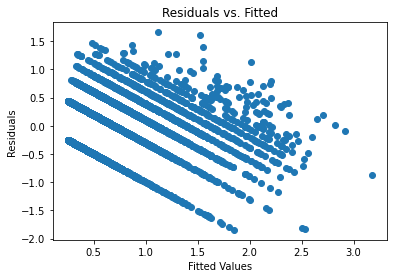

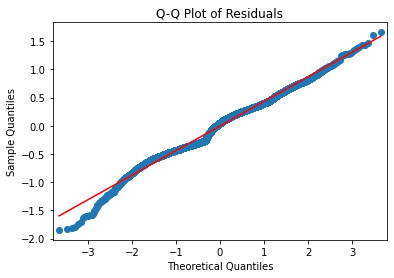

In [62]:
residuals = model.resid_response
fitted_values = model.fittedvalues
plt.scatter(fitted_values, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted')
plt.show()

# Quantile-Quantile plot of the residuals
sm.qqplot(residuals, line='s')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Q-Q Plot of Residuals')
plt.show()

## Layering on IMD

In [63]:
imd_data = pd.read_csv('../data/Index_of_Multiple_Deprivation_(Dec_2019)_Lookup_in_England.csv')
imd_data.head()

FID   LSOA11CD                   LSOA11NM    LAD19CD               LAD19NM  \
0    1  E01000001        City of London 001A  E09000001        City of London   
1    2  E01000104  Barking and Dagenham 014B  E09000002  Barking and Dagenham   
2    3  E01000205                Barnet 035A  E09000003                Barnet   
3    4  E01000002        City of London 001B  E09000001        City of London   
4    5  E01000003        City of London 001C  E09000001        City of London   

   IMD19  
0  29199  
1   6002  
2  27397  
3  30379  
4  14915

In [64]:
oa11_lsoa11_lookup = pd.read_csv('../data/Output_Area_to_Lower_layer_Super_Output_Area_to_Middle_layer_Super_Output_Area_to_Local_Authority_District_(December_2011)_Lookup_in_England_and_Wales.csv')
oa11_lsoa11_lookup.head()


/var/folders/zs/1hvc18dn7v94z77k1xy7g90c0000gn/T/ipykernel_89548/1005487974.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  oa11_lsoa11_lookup = pd.read_csv('data/Output_Area_to_Lower_layer_Super_Output_Area_to_Middle_layer_Super_Output_Area_to_Local_Authority_District_(December_2011)_Lookup_in_England_and_Wales.csv')


OA11CD   LSOA11CD             LSOA11NM   MSOA11CD            MSOA11NM  \
0  E00000001  E01000001  City of London 001A  E02000001  City of London 001   
1  E00000003  E01000001  City of London 001A  E02000001  City of London 001   
2  E00000005  E01000001  City of London 001A  E02000001  City of London 001   
3  E00000007  E01000001  City of London 001A  E02000001  City of London 001   
4  E00000010  E01000003  City of London 001C  E02000001  City of London 001   

     LAD11CD         LAD11NM LAD11NMW  ObjectId  
0  E09000001  City of London      NaN         1  
1  E09000001  City of London      NaN         2  
2  E09000001  City of London      NaN         3  
3  E09000001  City of London      NaN         4  
4  E09000001  City of London      NaN         5

In [65]:
oa11_oa21_lookup.head()

ObjectId     OA11CD     OA21CD CHNGIND    LAD22CD               LAD22NM  \
0         1  E00000124  E00000124       U  E09000002  Barking and Dagenham   
1         2  E00000125  E00000125       U  E09000002  Barking and Dagenham   
2         3  E00000128  E00000128       U  E09000002  Barking and Dagenham   
3         4  E00000129  E00000129       U  E09000002  Barking and Dagenham   
4         5  E00000130  E00000130       U  E09000002  Barking and Dagenham   

  LAD22NMW  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN

In [66]:
imd_frame = oa11_oa21_lookup[['OA11CD', 'OA21CD']].merge(
    oa11_lsoa11_lookup[['OA11CD', 'LSOA11CD']], how='inner', on='OA11CD'
).merge(
    imd_data[['LSOA11CD', 'IMD19']],
    how='inner',
    on='LSOA11CD'
)

imd_frame.head()

OA11CD     OA21CD   LSOA11CD  IMD19
0  E00000124  E00000124  E01000022   6098
1  E00000116  E00000116  E01000022   6098
2  E00000120  E00000120  E01000022   6098
3  E00000122  E00000122  E01000022   6098
4  E00000125  E00000125  E01000023   5243

In [67]:
oa_total_frame.head()

OA21CD    PAR22CD        PAR22NM     RGN22NM  population          area  \
0  E00060311  E04000255  Dalton Piercy  North East         312  6.758443e+06   
1  E00060356  E04000257       Greatham  North East         283  5.098650e+05   
2  E00060360  E04000257       Greatham  North East         274  6.863565e+04   
3  E00060357  E04000257       Greatham  North East         298  3.589880e+05   
4  E00060359  E04000257       Greatham  North East         274  6.126857e+04   

                                           amenities  
0  [{'name': 'N/A', 'amenity': 'post_box', 'data_...  
1  [{'name': 'The Bull and Dog', 'amenity': 'pub'...  
2                                                 []  
3  [{'name': 'N/A', 'amenity': 'waste_basket', 'd...  
4                                                 []

In [68]:
imd_frame.groupby(['OA21CD']).size().sort_values(ascending=False).head(10)

OA21CD
E00182748    5
E00189918    5
E00178635    4
E00180779    4
E00189204    4
E00178724    4
E00181936    4
E00185187    4
E00189219    4
E00176912    3
dtype: int64

In [69]:
raw_oa21_imd_lookup = imd_frame[['OA21CD', 'IMD19']].drop_duplicates()
oa_total_frame = oa_total_frame.merge(raw_oa21_imd_lookup, how='left', on='OA21CD')
oa_total_frame.head()

OA21CD    PAR22CD        PAR22NM     RGN22NM  population          area  \
0  E00060311  E04000255  Dalton Piercy  North East         312  6.758443e+06   
1  E00060356  E04000257       Greatham  North East         283  5.098650e+05   
2  E00060360  E04000257       Greatham  North East         274  6.863565e+04   
3  E00060357  E04000257       Greatham  North East         298  3.589880e+05   
4  E00060359  E04000257       Greatham  North East         274  6.126857e+04   

                                           amenities    IMD19  
0  [{'name': 'N/A', 'amenity': 'post_box', 'data_...  22123.0  
1  [{'name': 'The Bull and Dog', 'amenity': 'pub'...  14530.0  
2                                                 []  14530.0  
3  [{'name': 'N/A', 'amenity': 'waste_basket', 'd...  14530.0  
4                                                 []  14530.0

In [70]:
parish_data.head()

PAR22CD       PAR22NM     RGN22NM  population          area  \
0  E04000001      Blackrod  North West        5517  8.599134e+06   
1  E04000002       Horwich  North West       20908  1.424275e+07   
2  E04000003  Westhoughton  North West       25340  1.786415e+07   
3  E04000005   Saddleworth  North West       25466  7.613353e+07   
4  E04000008       Mossley  North West       11566  8.658747e+06   

                                        amenity_list rural_label  pub  school  \
0  {'post_box': 3, 'place_of_worship': 2, 'fast_f...       Urban    5       2   
1  {'waste_basket': 6, 'parking': 48, 'school': 9...       Mixed   14       9   
2  {'waste_basket': 22, 'charging_station': 1, 'a...       Mixed   10       9   
3  {'parking': 115, 'telephone': 8, 'bench': 63, ...       Mixed   34      14   
4  {'place_of_worship': 5, 'parking': 16, 'waste_...       Mixed   11       6   

   place_of_worship  
0                 2  
1                 8  
2                 9  
3                16  
4                 5

In [71]:
def weighted_imd(x,weighting_column):
    imd_total = 0
    weighting_total = 0
    for row in x.iterrows():
        imd_total += row[1].IMD19 * row[1][weighting_column]
        weighting_total += row[1][weighting_column]
    total = imd_total/weighting_total
    return total

parish_imd_frame = oa_total_frame.groupby(['PAR22CD', 'PAR22NM']).apply(lambda x: weighted_imd(x, 'population')).reset_index()
parish_imd_frame.columns = ['PAR22CD', 'PAR22NM', 'population_weighted_imd']
parish_imd_frame.head()


PAR22CD       PAR22NM  population_weighted_imd
0  E04000001      Blackrod             20311.266630
1  E04000002       Horwich             14657.016644
2  E04000003  Westhoughton             18738.612747
3  E04000005   Saddleworth             25033.770282
4  E04000008       Mossley             14241.922013

In [72]:
inty = oa_total_frame.groupby(['PAR22CD', 'PAR22NM']).apply(lambda x: weighted_imd(x, 'area')).reset_index()
inty.columns = ['PAR22CD', 'PAR22NM', 'area_weighted_imd']
inty.head()

PAR22CD       PAR22NM  area_weighted_imd
0  E04000001      Blackrod       23220.071314
1  E04000002       Horwich       22628.188830
2  E04000003  Westhoughton       18446.579204
3  E04000005   Saddleworth       24561.313884
4  E04000008       Mossley        9925.190128

In [73]:
parish_imd_frame = parish_imd_frame.merge(inty, how='inner', on=['PAR22CD', 'PAR22NM'])
parish_imd_frame.head()

PAR22CD       PAR22NM  population_weighted_imd  area_weighted_imd
0  E04000001      Blackrod             20311.266630       23220.071314
1  E04000002       Horwich             14657.016644       22628.188830
2  E04000003  Westhoughton             18738.612747       18446.579204
3  E04000005   Saddleworth             25033.770282       24561.313884
4  E04000008       Mossley             14241.922013        9925.190128

In [74]:
parish_imd_frame[pd.isnull(parish_imd_frame.area_weighted_imd)].head()

PAR22CD    PAR22NM  population_weighted_imd  area_weighted_imd
9575  W04000001  Aberffraw                      NaN                NaN
9576  W04000002     Amlwch                      NaN                NaN
9577  W04000003  Beaumaris                      NaN                NaN
9578  W04000004   Bodedern                      NaN                NaN
9579  W04000005  Bodffordd                      NaN                NaN

In [75]:
parish_data = parish_data.merge(
    parish_imd_frame[['PAR22CD', 'population_weighted_imd', 'area_weighted_imd']],
    how='inner',
    on='PAR22CD'
)

parish_data.head()

PAR22CD       PAR22NM     RGN22NM  population          area  \
0  E04000001      Blackrod  North West        5517  8.599134e+06   
1  E04000002       Horwich  North West       20908  1.424275e+07   
2  E04000003  Westhoughton  North West       25340  1.786415e+07   
3  E04000005   Saddleworth  North West       25466  7.613353e+07   
4  E04000008       Mossley  North West       11566  8.658747e+06   

                                        amenity_list rural_label  pub  school  \
0  {'post_box': 3, 'place_of_worship': 2, 'fast_f...       Urban    5       2   
1  {'waste_basket': 6, 'parking': 48, 'school': 9...       Mixed   14       9   
2  {'waste_basket': 22, 'charging_station': 1, 'a...       Mixed   10       9   
3  {'parking': 115, 'telephone': 8, 'bench': 63, ...       Mixed   34      14   
4  {'place_of_worship': 5, 'parking': 16, 'waste_...       Mixed   11       6   

   place_of_worship  population_weighted_imd  area_weighted_imd  
0                 2             20311.266630       23220.071314  
1                 8             14657.016644       22628.188830  
2                 9             18738.612747       18446.579204  
3                16             25033.770282       24561.313884  
4                 5             14241.922013        9925.190128

In [76]:
parish_data[parish_data.PAR22NM == 'Great Ouseburn']

PAR22CD         PAR22NM                   RGN22NM  population  \
5082  E04007350  Great Ouseburn  Yorkshire and The Humber         623   

              area                                       amenity_list  \
5082  8.649654e+06  {'post_box': 2, 'post_office': 1, 'school': 1,...   

     rural_label  pub  school  place_of_worship  population_weighted_imd  \
5082       Rural    1       1                 1                  23792.0   

      area_weighted_imd  
5082            23792.0

## Layering on house stats

In [77]:
house_data = pd.read_csv('../data/house_sales_by_parish.csv')
house_data.head()

Unnamed: 0  last_year_median_price  last_year_total_sales  \
0  E04000255                524997.5                    6.0   
1  E04000257                151250.0                   32.0   
2  E04000258                260000.0                   14.0   
3  E04000260                110000.0                   55.0   
4  E04013151                229500.0                   10.0   

   three_year_median_price  three_year_total_sales  five_year_median_price  \
0                 328000.0                    17.0                325000.0   
1                 135000.0                   112.0                134000.0   
2                 248500.0                    76.0                240000.0   
3                 100000.0                   215.0                 95000.0   
4                 200000.0                    31.0                200000.0   

   five_year_total_sales  
0                   23.0  
1                  157.0  
2                  113.0  
3                  290.0  
4                   46.0

In [78]:
house_data.rename(columns={'Unnamed: 0':'PAR22CD'}, inplace=True)
house_data.head()

PAR22CD  last_year_median_price  last_year_total_sales  \
0  E04000255                524997.5                    6.0   
1  E04000257                151250.0                   32.0   
2  E04000258                260000.0                   14.0   
3  E04000260                110000.0                   55.0   
4  E04013151                229500.0                   10.0   

   three_year_median_price  three_year_total_sales  five_year_median_price  \
0                 328000.0                    17.0                325000.0   
1                 135000.0                   112.0                134000.0   
2                 248500.0                    76.0                240000.0   
3                 100000.0                   215.0                 95000.0   
4                 200000.0                    31.0                200000.0   

   five_year_total_sales  
0                   23.0  
1                  157.0  
2                  113.0  
3                  290.0  
4                   46.0

In [79]:
parish_data = parish_data.merge(house_data, how='left', on='PAR22CD')
parish_data.head()

PAR22CD       PAR22NM     RGN22NM  population          area  \
0  E04000001      Blackrod  North West        5517  8.599134e+06   
1  E04000002       Horwich  North West       20908  1.424275e+07   
2  E04000003  Westhoughton  North West       25340  1.786415e+07   
3  E04000005   Saddleworth  North West       25466  7.613353e+07   
4  E04000008       Mossley  North West       11566  8.658747e+06   

                                        amenity_list rural_label  pub  school  \
0  {'post_box': 3, 'place_of_worship': 2, 'fast_f...       Urban    5       2   
1  {'waste_basket': 6, 'parking': 48, 'school': 9...       Mixed   14       9   
2  {'waste_basket': 22, 'charging_station': 1, 'a...       Mixed   10       9   
3  {'parking': 115, 'telephone': 8, 'bench': 63, ...       Mixed   34      14   
4  {'place_of_worship': 5, 'parking': 16, 'waste_...       Mixed   11       6   

   place_of_worship  population_weighted_imd  area_weighted_imd  \
0                 2             20311.266630       23220.071314   
1                 8             14657.016644       22628.188830   
2                 9             18738.612747       18446.579204   
3                16             25033.770282       24561.313884   
4                 5             14241.922013        9925.190128   

   last_year_median_price  last_year_total_sales  three_year_median_price  \
0                186000.0                   76.0                 182500.0   
1                176000.0                  454.0                 170000.0   
2                190000.0                  525.0                 175000.0   
3                272537.5                  422.0                 250000.0   
4                180000.0                  220.0                 162500.0   

   three_year_total_sales  five_year_median_price  five_year_total_sales  
0                   443.0                174975.0                  678.0  
1                  1844.0                157000.0                 2690.0  
2                  2126.0                163250.0                 3078.0  
3                  1955.0                240000.0                 2964.0  
4                   967.0                150000.0                 1422.0

In [80]:
parish_data.last_year_median_price.describe()

count    9.220000e+03
mean     4.658304e+05
std      3.708069e+05
min      1.000000e+03
25%      2.898938e+05
50%      4.000000e+05
75%      5.500000e+05
max      1.485400e+07
Name: last_year_median_price, dtype: float64

In [81]:
parish_data.last_year_total_sales.describe()

count     9575.000000
mean        90.581514
std        420.804203
min          0.000000
25%          4.000000
50%         11.000000
75%         37.000000
max      11461.000000
Name: last_year_total_sales, dtype: float64

In [82]:
smaller = parish_data[parish_data.five_year_total_sales >= 5]

encoded_rural = pd.get_dummies(smaller['rural_label'], prefix='rural')
encoded_region = pd.get_dummies(smaller['RGN22NM'], prefix='region')

# Prepare the data
X = smaller[['pub', 'school', 'place_of_worship', 'population', 'area', 'population_weighted_imd']]
X = pd.concat([X, encoded_rural, encoded_region], axis=1)
X = sm.add_constant(X)

y = smaller['five_year_median_price']

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the model summary
print(results.summary())

                              OLS Regression Results                              
Dep. Variable:     five_year_median_price   R-squared:                       0.315
Model:                                OLS   Adj. R-squared:                  0.313
Method:                     Least Squares   F-statistic:                     270.9
Date:                    Fri, 14 Jul 2023   Prob (F-statistic):               0.00
Time:                            21:30:49   Log-Likelihood:            -1.2542e+05
No. Observations:                    9461   AIC:                         2.509e+05
Df Residuals:                        9444   BIC:                         2.510e+05
Df Model:                              16                                         
Covariance Type:                nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [83]:
parish_data[(parish_data.five_year_total_sales >= 30) & (parish_data.population <= 3000)].describe()

population          area          pub       school  place_of_worship  \
count  5172.000000  5.172000e+03  5172.000000  5172.000000       5172.000000   
mean   1027.410480  1.293450e+07     1.380124     0.804331          1.529582   
std     700.528125  1.101816e+07     1.231844     0.750425          0.958476   
min     104.000000  6.230078e+04     0.000000     0.000000          0.000000   
25%     484.000000  6.839121e+06     1.000000     0.000000          1.000000   
50%     786.000000  1.032700e+07     1.000000     1.000000          1.000000   
75%    1421.250000  1.581078e+07     2.000000     1.000000          2.000000   
max    2998.000000  2.048206e+08    21.000000     9.000000          9.000000   

       population_weighted_imd  area_weighted_imd  last_year_median_price  \
count              5172.000000        5172.000000            5.161000e+03   
mean              19782.633230       19687.587857            4.530393e+05   
std                5822.029343        5800.555072            2.638566e+05   
min                 322.000000         322.000000            2.500000e+04   
25%               15581.000000       15508.250000            3.075000e+05   
50%               19940.657459       19742.000000            4.087500e+05   
75%               24135.000000       23985.000000            5.400000e+05   
max               32821.000000       32821.000000            1.093750e+07   

       last_year_total_sales  three_year_median_price  three_year_total_sales  \
count            5172.000000             5.172000e+03             5172.000000   
mean               15.877997             3.888357e+05               77.420340   
std                12.981250             1.558681e+05               63.782855   
min                 0.000000             4.000000e+04                9.000000   
25%                 7.000000             2.835938e+05               33.000000   
50%                11.000000             3.600000e+05               54.000000   
75%                21.000000             4.600000e+05              103.000000   
max               116.000000             1.587500e+06              737.000000   

       five_year_median_price  five_year_total_sales  
count            5.172000e+03            5172.000000  
mean             3.722840e+05             116.476218  
std              1.483430e+05              95.208879  
min              2.350000e+04              30.000000  
25%              2.726875e+05              49.000000  
50%              3.490000e+05              82.000000  
75%              4.407250e+05             154.000000  
max              1.467500e+06             878.000000

In [84]:
smaller = parish_data[(parish_data.five_year_total_sales >= 30) & (parish_data.population <= 3000)]

encoded_region = pd.get_dummies(smaller['RGN22NM'], prefix='region')
has_pub_feature = smaller.pub.apply(lambda x: 1 if x > 0 else 0)
has_school_feature = smaller.school.apply(lambda x: 1 if x > 0 else 0)
has_place_of_worship_feature = smaller.place_of_worship.apply(lambda x: 1 if x > 0 else 0)

# Prepare the data
X = smaller[['population', 'area', 'population_weighted_imd']]
X = pd.concat([X, encoded_region, has_pub_feature, has_school_feature, has_place_of_worship_feature], axis=1)
X = sm.add_constant(X)

y = smaller['five_year_median_price']

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the model summary
print(results.summary())

                              OLS Regression Results                              
Dep. Variable:     five_year_median_price   R-squared:                       0.432
Model:                                OLS   Adj. R-squared:                  0.431
Method:                     Least Squares   F-statistic:                     302.0
Date:                    Fri, 14 Jul 2023   Prob (F-statistic):               0.00
Time:                            21:30:49   Log-Likelihood:                -67459.
No. Observations:                    5172   AIC:                         1.349e+05
Df Residuals:                        5158   BIC:                         1.350e+05
Df Model:                              13                                         
Covariance Type:                nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.impute import SimpleImputer

smaller = parish_data[(parish_data.five_year_total_sales >= 30) & (parish_data.population <= 3000)]

encoded_region = pd.get_dummies(smaller['RGN22NM'], prefix='region')
has_pub_feature = smaller.pub.apply(lambda x: 1 if x > 0 else 0)
has_school_feature = smaller.school.apply(lambda x: 1 if x > 0 else 0)
has_place_of_worship_feature = smaller.place_of_worship.apply(lambda x: 1 if x > 0 else 0)

# Prepare the data
X = smaller[['population', 'area', 'population_weighted_imd']]
X = pd.concat([X, encoded_region, has_pub_feature, has_school_feature, has_place_of_worship_feature], axis=1)

interaction = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_interaction = interaction.fit_transform(X)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_interaction)

y = smaller['five_year_median_price']

# Create the Gradient Boosting model
model = GradientBoostingRegressor()
model.fit(X_scaled, y)

# Get the feature importances
importances = model.feature_importances_

# Get the names of the polynomial features
feature_names = interaction.get_feature_names_out(X.columns)

# Create a dataframe to store feature names and importances
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the dataframe by importance in descending order
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)

# Print the feature importances
for index, row in feature_importances_df.iterrows():
    if row['Importance'] > 0:
        print(f"{row['Feature']}: {row['Importance']}")


population_weighted_imd region_South East: 0.3228800887013917
population: 0.0773065632357594
area region_South East: 0.07116499898504872
population_weighted_imd place_of_worship: 0.06633355109423611
area population_weighted_imd: 0.0487813274212769
population^2: 0.04408432555127158
population_weighted_imd region_South West: 0.04262998716734042
population_weighted_imd region_East of England: 0.041544171934111224
population region_East Midlands: 0.03289085051017964
population region_Yorkshire and The Humber: 0.03247049212292293
population_weighted_imd: 0.020169036781705146
population_weighted_imd^2: 0.017214359111587963
population region_South East: 0.01620168722526313
population area: 0.015076312399478807
population place_of_worship: 0.013561344445770375
population_weighted_imd school: 0.012842673894701706
population pub: 0.009706639617828177
area region_North East: 0.009191707579765744
population_weighted_imd pub: 0.00862160378006022
area pub: 0.008595835097523407
population region_Nort

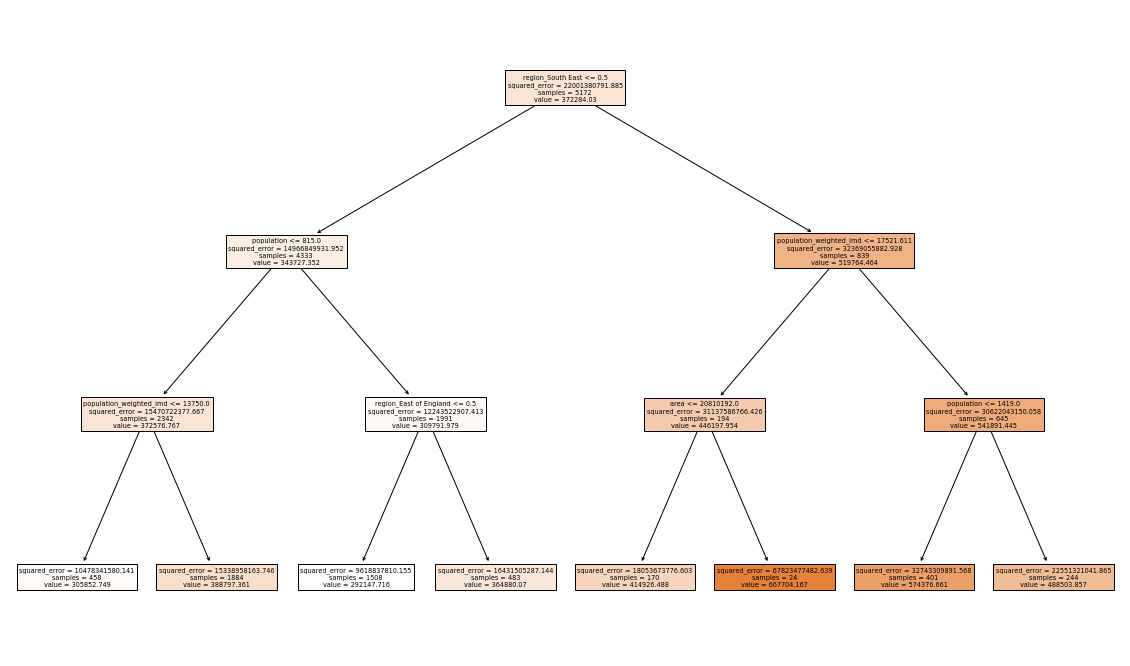

In [86]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

smaller = parish_data[(parish_data.five_year_total_sales >= 30) & (parish_data.population <= 3000)]

encoded_region = pd.get_dummies(smaller['RGN22NM'], prefix='region')
has_pub_feature = smaller.pub.apply(lambda x: 1 if x > 0 else 0)
has_school_feature = smaller.school.apply(lambda x: 1 if x > 0 else 0)
has_place_of_worship_feature = smaller.place_of_worship.apply(lambda x: 1 if x > 0 else 0)

# Prepare the data
X = smaller[['population', 'area', 'population_weighted_imd']]
X = pd.concat([X, encoded_region, has_pub_feature, has_school_feature, has_place_of_worship_feature], axis=1)
y = smaller.five_year_median_price

tree_model = DecisionTreeRegressor(max_depth=3)  # Set the maximum depth of the tree

# Fit the model to the data
tree_model.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(20, 12))
plot_tree(tree_model, feature_names=X.columns, filled=True)
plt.show()

In [87]:
# Create the random forest regressor
from sklearn.ensemble import RandomForestRegressor

smaller = parish_data[(parish_data.five_year_total_sales >= 30) & (parish_data.population <= 3000)]

encoded_region = pd.get_dummies(smaller['RGN22NM'], prefix='region')
has_pub_feature = smaller.pub.apply(lambda x: 1 if x > 0 else 0)
all_pubs = smaller.pub.apply(lambda x: 1)
no_pubs = smaller.pub.apply(lambda x: 0)
has_school_feature = smaller.school.apply(lambda x: 1 if x > 0 else 0)
has_place_of_worship_feature = smaller.place_of_worship.apply(lambda x: 1 if x > 0 else 0)

# Prepare the data
X = smaller[['population', 'area', 'population_weighted_imd']]
X_wide = pd.concat([X, encoded_region, has_pub_feature, has_school_feature, has_place_of_worship_feature], axis=1)

interaction = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_interaction = interaction.fit_transform(X_wide)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_interaction)

rf_model = RandomForestRegressor(n_estimators=100, max_depth=4)
rf_model.fit(X_scaled, y)

# Create a copy of X with the 'pub' feature set to 1 (presence of pub)
X_with_pub = X.copy()
X_with_pub = pd.concat([X_with_pub, encoded_region, all_pubs, has_school_feature, has_place_of_worship_feature], axis=1)
X_with_pub_interaction = interaction.transform(X_with_pub)
X_with_pub_scaled = scaler.transform(X_with_pub_interaction)

# Make predictions with the 'pub' feature set to 1
predictions_with_pub = rf_model.predict(X_with_pub_scaled)

# Create a copy of X with the 'pub' feature set to 0 (absence of pub)
X_without_pub = X.copy()
X_without_pub = pd.concat([X_without_pub, encoded_region, no_pubs, has_school_feature, has_place_of_worship_feature], axis=1)
X_without_pub_interaction = interaction.transform(X_without_pub)
X_without_pub_scaled = scaler.transform(X_without_pub_interaction)

# Make predictions with the 'pub' feature set to 0
predictions_without_pub = rf_model.predict(X_without_pub_scaled)

# Compute the difference in predicted results
difference = predictions_with_pub - predictions_without_pub

# Create a DataFrame to store the comparison
comparison_df = pd.DataFrame({'With_pub': predictions_with_pub, 'Without_pub': predictions_without_pub, 'Difference': difference})
print(comparison_df.head())

        With_pub    Without_pub   Difference
0  309027.040988  309027.040988     0.000000
1  376997.368692  376997.368692     0.000000
2  310383.409977  309870.760783   512.649194
3  263992.233813  262057.412576  1934.821236
4  263550.735415  260402.405108  3148.330307


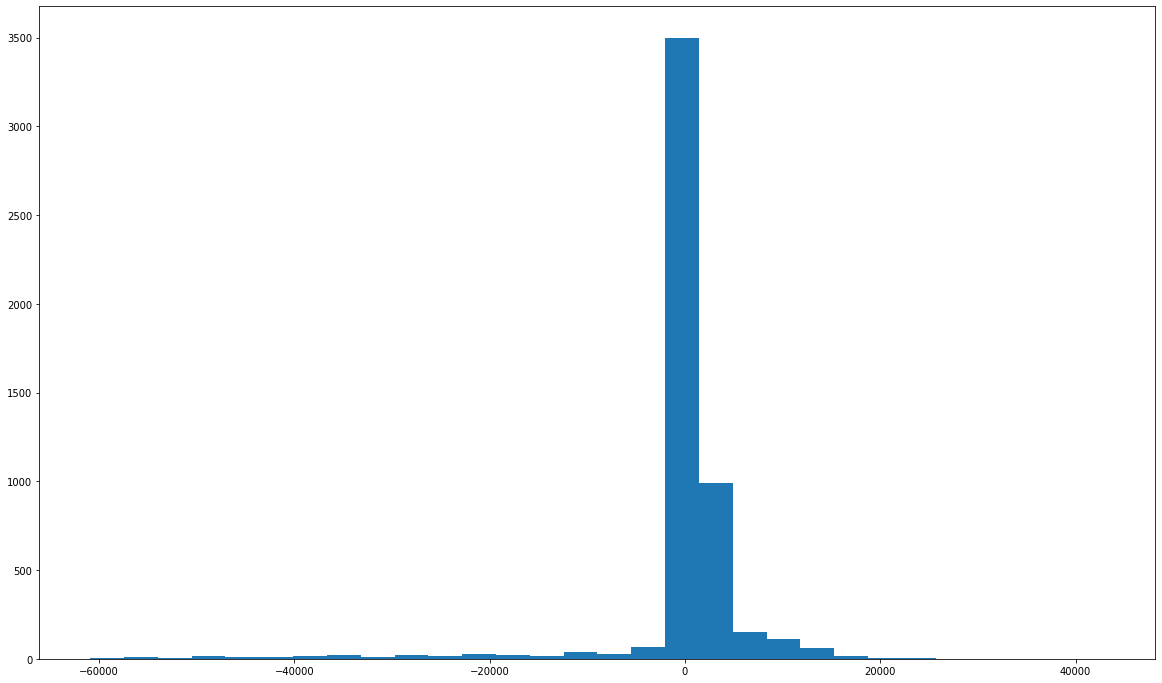

In [88]:
fig, ax = plt.subplots(figsize=(20,12))
plt.hist(comparison_df.Difference, bins=30)
plt.show()

In [89]:
comparison_df.Difference.describe()

count     5172.000000
mean      -239.190859
std       7721.529511
min     -60917.280171
25%          0.000000
50%          0.000000
75%       1823.162357
max      42985.037535
Name: Difference, dtype: float64

### Am I overfitting?

In [90]:
from sklearn.model_selection import cross_val_score, train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

# Create the random forest regressor
rf_model = RandomForestRegressor(n_estimators=100, max_depth=4)

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Evaluate model performance on training data
train_score = rf_model.score(X_train, y_train)

# Evaluate model performance on test data
test_score = rf_model.score(X_test, y_test)

# Print the cross-validation scores, train score, and test score
print("Cross-validation scores:", cv_scores)
print("Train score:", train_score)
print("Test score:", test_score)

Cross-validation scores: [0.33619984 0.38140273 0.34648691 0.39198173 0.37498036]
Train score: 0.42783807526366857
Test score: 0.3579950562271005


In [91]:
oa_populations.head()

date  geography geography code  Residence type: Total; measures: Value  \
0  2021  E00060274      E00060274                                     273   
1  2021  E00060275      E00060275                                     416   
2  2021  E00060276      E00060276                                     259   
3  2021  E00060277      E00060277                                     278   
4  2021  E00060279      E00060279                                     276   

   Residence type: Lives in a household; measures: Value  \
0                                                273       
1                                                416       
2                                                259       
3                                                278       
4                                                276       

   Residence type: Lives in a communal establishment; measures: Value  
0                                                  0                   
1                                                  0                   
2                                                  0                   
3                                                  0                   
4                                                  0

## Can we predict number of sales?

In [92]:
parish_data.head()

PAR22CD       PAR22NM     RGN22NM  population          area  \
0  E04000001      Blackrod  North West        5517  8.599134e+06   
1  E04000002       Horwich  North West       20908  1.424275e+07   
2  E04000003  Westhoughton  North West       25340  1.786415e+07   
3  E04000005   Saddleworth  North West       25466  7.613353e+07   
4  E04000008       Mossley  North West       11566  8.658747e+06   

                                        amenity_list rural_label  pub  school  \
0  {'post_box': 3, 'place_of_worship': 2, 'fast_f...       Urban    5       2   
1  {'waste_basket': 6, 'parking': 48, 'school': 9...       Mixed   14       9   
2  {'waste_basket': 22, 'charging_station': 1, 'a...       Mixed   10       9   
3  {'parking': 115, 'telephone': 8, 'bench': 63, ...       Mixed   34      14   
4  {'place_of_worship': 5, 'parking': 16, 'waste_...       Mixed   11       6   

   place_of_worship  population_weighted_imd  area_weighted_imd  \
0                 2             20311.266630       23220.071314   
1                 8             14657.016644       22628.188830   
2                 9             18738.612747       18446.579204   
3                16             25033.770282       24561.313884   
4                 5             14241.922013        9925.190128   

   last_year_median_price  last_year_total_sales  three_year_median_price  \
0                186000.0                   76.0                 182500.0   
1                176000.0                  454.0                 170000.0   
2                190000.0                  525.0                 175000.0   
3                272537.5                  422.0                 250000.0   
4                180000.0                  220.0                 162500.0   

   three_year_total_sales  five_year_median_price  five_year_total_sales  
0                   443.0                174975.0                  678.0  
1                  1844.0                157000.0                 2690.0  
2                  2126.0                163250.0                 3078.0  
3                  1955.0                240000.0                 2964.0  
4                   967.0                150000.0                 1422.0

In [93]:
sm.Logit

statsmodels.discrete.discrete_model.Logit

In [123]:
smaller = parish_data[parish_data.rural_label == 'Rural']

encoded_region = pd.get_dummies(smaller['RGN22NM'], prefix='region')

# Prepare the data
X = smaller[['population', 'area', 'population_weighted_imd']]

X = pd.concat([X, encoded_region], axis=1)
X = sm.add_constant(X)

has_pub_feature = smaller.pub.apply(lambda x: 1 if x > 0 else 0)
has_school_feature = smaller.school.apply(lambda x: 1 if x > 0 else 0)
has_worship_feature = smaller.place_of_worship.apply(lambda x: 1 if x > 0 else 0)
#y = smaller['pub']
y = has_worship_feature

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the model summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       place_of_worship   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     71.26
Date:                Fri, 14 Jul 2023   Prob (F-statistic):          4.25e-140
Time:                        21:54:39   Log-Likelihood:                 109.82
No. Observations:                7781   AIC:                            -197.6
Df Residuals:                    7770   BIC:                            -121.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.impute import SimpleImputer

smaller = parish_data[parish_data.rural_label == 'Rural']

encoded_region = pd.get_dummies(smaller['RGN22NM'], prefix='region')
has_pub_feature = smaller.pub.apply(lambda x: 1 if x > 0 else 0)
has_school_feature = smaller.school.apply(lambda x: 1 if x > 0 else 0)
has_place_of_worship_feature = smaller.place_of_worship.apply(lambda x: 1 if x > 0 else 0)

# Prepare the data
X = smaller[['population', 'area', 'population_weighted_imd']]
X = pd.concat([X, encoded_region, has_pub_feature, has_school_feature, has_place_of_worship_feature], axis=1)

interaction = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_interaction = interaction.fit_transform(X)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_interaction)

y = smaller['last_year_total_sales']

# Create the Gradient Boosting model
model = GradientBoostingRegressor()
model.fit(X_scaled, y)

# Get the feature importances
importances = model.feature_importances_

# Get the names of the polynomial features
feature_names = interaction.get_feature_names_out(X.columns)

# Create a dataframe to store feature names and importances
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the dataframe by importance in descending order
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)

# Print the feature importances
for index, row in feature_importances_df.iterrows():
    if row['Importance'] > 0:
        print(f"{row['Feature']}: {row['Importance']}")


population: 0.4532930796401021
population^2: 0.4078468459158388
population school: 0.037842736935650136
population pub: 0.036893261962895225
population place_of_worship: 0.03540085647034438
population region_North East: 0.006255330914110637
area population_weighted_imd: 0.004948243217687432
population population_weighted_imd: 0.002278767996293501
population region_South West: 0.0021312195391324177
population_weighted_imd school: 0.0016397329279538584
population region_Yorkshire and The Humber: 0.0014385551819960426
population region_North West: 0.0009081679418071481
population_weighted_imd^2: 0.0007977788258363196
area region_South West: 0.0007595479023681766
population area: 0.0006804664695104926
population_weighted_imd region_East of England: 0.000607748069041711
population_weighted_imd region_South West: 0.0005866767983362009
population region_South East: 0.0005698017088478981
area school: 0.000548155459453552
population_weighted_imd pub: 0.0005201350959843752
area: 0.00051494824283

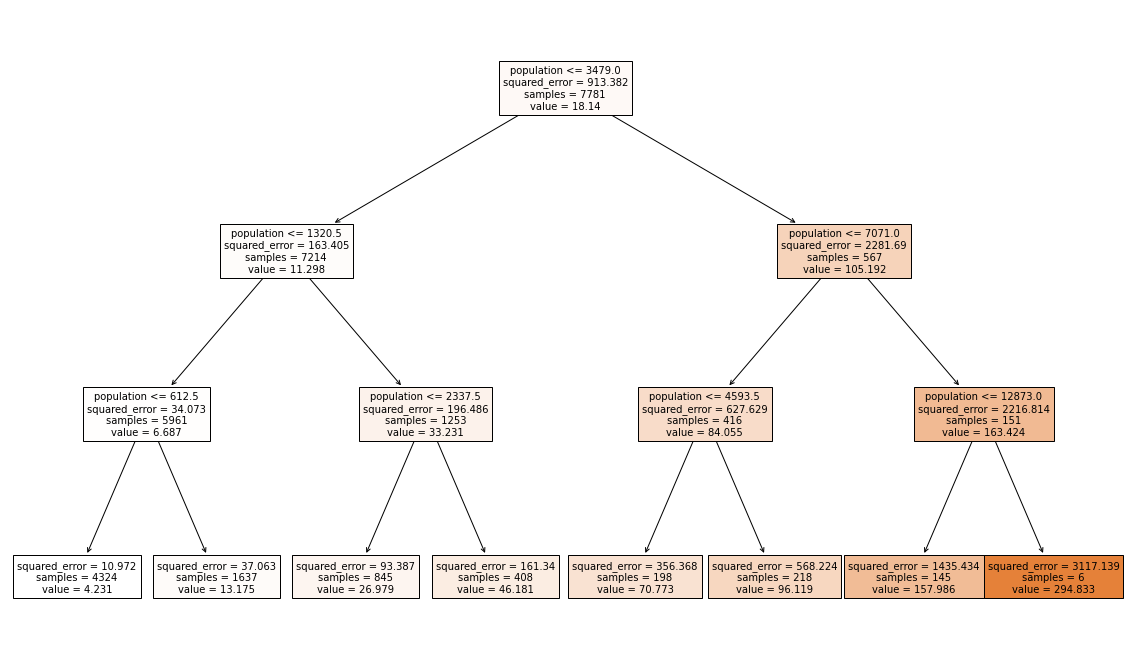

In [96]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

smaller = parish_data[parish_data.rural_label == 'Rural']

encoded_region = pd.get_dummies(smaller['RGN22NM'], prefix='region')
has_pub_feature = smaller.pub.apply(lambda x: 1 if x > 0 else 0)
has_school_feature = smaller.school.apply(lambda x: 1 if x > 0 else 0)
has_place_of_worship_feature = smaller.place_of_worship.apply(lambda x: 1 if x > 0 else 0)

# Prepare the data
X = smaller[['population', 'area', 'population_weighted_imd']]
X = pd.concat([X, encoded_region, has_pub_feature, has_school_feature, has_place_of_worship_feature], axis=1)
y = smaller.last_year_total_sales

tree_model = DecisionTreeRegressor(max_depth=3)  # Set the maximum depth of the tree

# Fit the model to the data
tree_model.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(20, 12))
plot_tree(tree_model, feature_names=X.columns, filled=True)
plt.show()

In [97]:
parish_data['sales_last_year_per_population'] = parish_data.last_year_total_sales / parish_data.population
parish_data.head()

PAR22CD       PAR22NM     RGN22NM  population          area  \
0  E04000001      Blackrod  North West        5517  8.599134e+06   
1  E04000002       Horwich  North West       20908  1.424275e+07   
2  E04000003  Westhoughton  North West       25340  1.786415e+07   
3  E04000005   Saddleworth  North West       25466  7.613353e+07   
4  E04000008       Mossley  North West       11566  8.658747e+06   

                                        amenity_list rural_label  pub  school  \
0  {'post_box': 3, 'place_of_worship': 2, 'fast_f...       Urban    5       2   
1  {'waste_basket': 6, 'parking': 48, 'school': 9...       Mixed   14       9   
2  {'waste_basket': 22, 'charging_station': 1, 'a...       Mixed   10       9   
3  {'parking': 115, 'telephone': 8, 'bench': 63, ...       Mixed   34      14   
4  {'place_of_worship': 5, 'parking': 16, 'waste_...       Mixed   11       6   

   place_of_worship  population_weighted_imd  area_weighted_imd  \
0                 2             20311.266630       23220.071314   
1                 8             14657.016644       22628.188830   
2                 9             18738.612747       18446.579204   
3                16             25033.770282       24561.313884   
4                 5             14241.922013        9925.190128   

   last_year_median_price  last_year_total_sales  three_year_median_price  \
0                186000.0                   76.0                 182500.0   
1                176000.0                  454.0                 170000.0   
2                190000.0                  525.0                 175000.0   
3                272537.5                  422.0                 250000.0   
4                180000.0                  220.0                 162500.0   

   three_year_total_sales  five_year_median_price  five_year_total_sales  \
0                   443.0                174975.0                  678.0   
1                  1844.0                157000.0                 2690.0   
2                  2126.0                163250.0                 3078.0   
3                  1955.0                240000.0                 2964.0   
4                   967.0                150000.0                 1422.0   

   sales_last_year_per_population  
0                        0.013776  
1                        0.021714  
2                        0.020718  
3                        0.016571  
4                        0.019021

/opt/homebrew/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


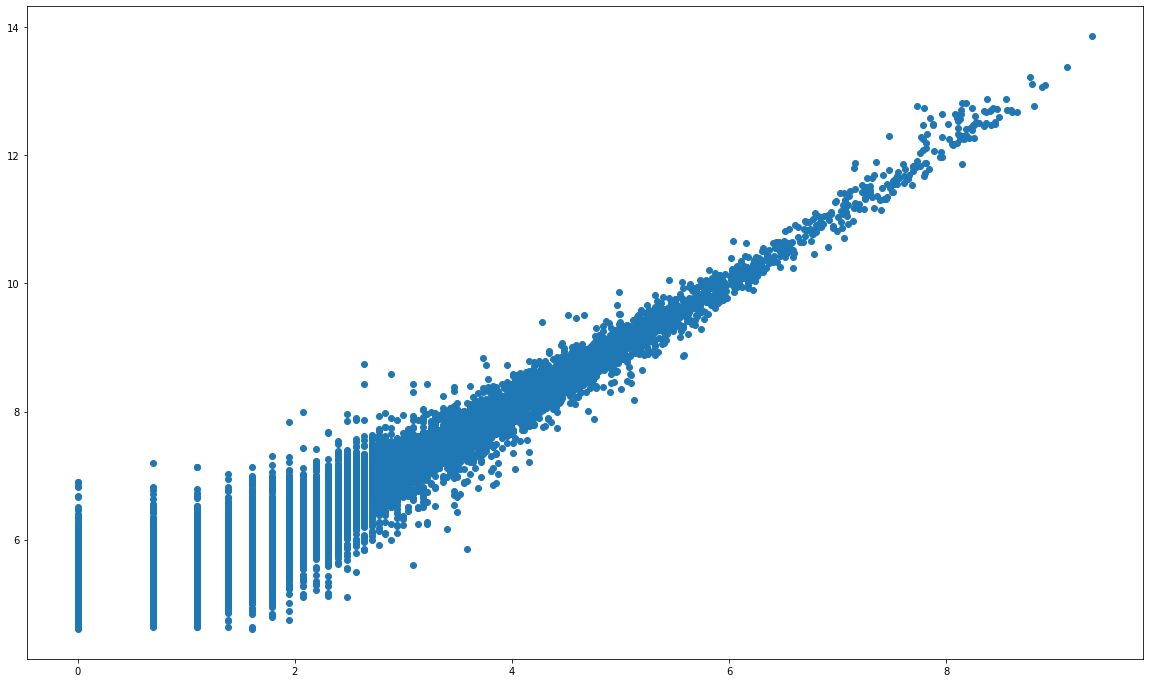

In [98]:
fig, ax = plt.subplots(figsize=(20,12))
plt.scatter(np.log(parish_data.last_year_total_sales), np.log(parish_data.population))
plt.show()

## Let's predict facilities

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.impute import SimpleImputer

smaller = parish_data[parish_data.rural_label == 'Rural']

encoded_region = pd.get_dummies(smaller['RGN22NM'], prefix='region')
#has_pub_feature = smaller.pub.apply(lambda x: 1 if x > 0 else 0)
#has_school_feature = smaller.school.apply(lambda x: 1 if x > 0 else 0)
#has_place_of_worship_feature = smaller.place_of_worship.apply(lambda x: 1 if x > 0 else 0)

# Prepare the data
X = smaller[['population', 'area', 'population_weighted_imd', 'last_year_total_sales']]
X = pd.concat([X, encoded_region], axis=1)

#interaction = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
#X_interaction = interaction.fit_transform(X)


#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X_interaction)

y = smaller['pub']

# Create the Gradient Boosting model
model = GradientBoostingClassifier()
model.fit(X, y)

# Get the feature importances
importances = model.feature_importances_

# Get the names of the polynomial features
#feature_names = interaction.get_feature_names_out(X.columns)
feature_names = X.columns

# Create a dataframe to store feature names and importances
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the dataframe by importance in descending order
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)

# Print the feature importances
for index, row in feature_importances_df.iterrows():
    if row['Importance'] > 0:
        print(f"{row['Feature']}: {row['Importance']}")


population: 0.47307221845048025
last_year_total_sales: 0.21438672444855741
area: 0.13105842695666137
population_weighted_imd: 0.11278099900803486
region_North West: 0.030792437467127887
region_South East: 0.01109890349685078
region_East of England: 0.010722767393938737
region_West Midlands: 0.004478949957150076
region_Yorkshire and The Humber: 0.0039150169744253975
region_South West: 0.003133586032079
region_North East: 0.0024533314735223936
region_East Midlands: 0.002106638341171786


In [100]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression

In [101]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.tree import plot_tree

smaller = parish_data[parish_data.rural_label == 'Rural']

X = smaller[['population']]
encoded_region = pd.get_dummies(smaller['RGN22NM'], prefix='region')
X = pd.concat([X, encoded_region, np.log(X), np.sqrt(X)], axis=1)

interaction = PolynomialFeatures(degree=3, interaction_only=False, include_bias=True)
X_interaction = interaction.fit_transform(X)

has_pub_feature = smaller.pub.apply(lambda x: 1 if x > 0 else 0)
has_school_feature = smaller.school.apply(lambda x: 1 if x > 0 else 0)
has_place_of_worship_feature = smaller.place_of_worship.apply(lambda x: 1 if x > 0 else 0)


tree_model = GradientBoostingRegressor(max_depth=3, subsample=0.7)  # Set the maximum depth of the tree

# Fit the model to the data
tree_model.fit(X_interaction, smaller.pub)

feature_names = interaction.get_feature_names_out(X.columns)

# Visualize the decision tree
#plt.figure(figsize=(40, 30))
#plot_tree(tree_model, feature_names=feature_names, filled=True)
#plt.savefig("../results/prediction_tree.png")
#plt.show()

In [102]:
x = np.array([150])
loggy = np.log(x)
sq = np.sqrt(x)
ency = [1 if "region_" + 'North West' == i else 0 for i in encoded_region.columns]
np.concatenate((x, loggy, sq, ency))

array([150.        ,   5.01063529,  12.24744871,   0.        ,
         0.        ,   0.        ,   1.        ,   0.        ,
         0.        ,   0.        ,   0.        ])

In [103]:
def make_prediction(population, region_name, interaction, model):
    x = np.array([population])
    ency = [1 if "region_" + region_name == i else 0 for i in encoded_region.columns]
    loggy = np.log(x)
    sq = np.sqrt(x)
    better_x = np.concatenate((x, ency, loggy, sq)).reshape(1,-1)
    inty = interaction.transform(better_x)
    preds = model.predict(inty)
    return preds

make_prediction(150, 'North East', interaction, tree_model)[0]

/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


0.38951796531757776

In [104]:
predictions = {}
for region in smaller.RGN22NM.drop_duplicates():
    predictions[region] = {}
    for population in range(100,2000):
        prob_pub = make_prediction(population, region, interaction, tree_model)[0]
        predictions[region][population] = prob_pub
            
        

/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does no

/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does no

/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does no

/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does no

/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does no

/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does no

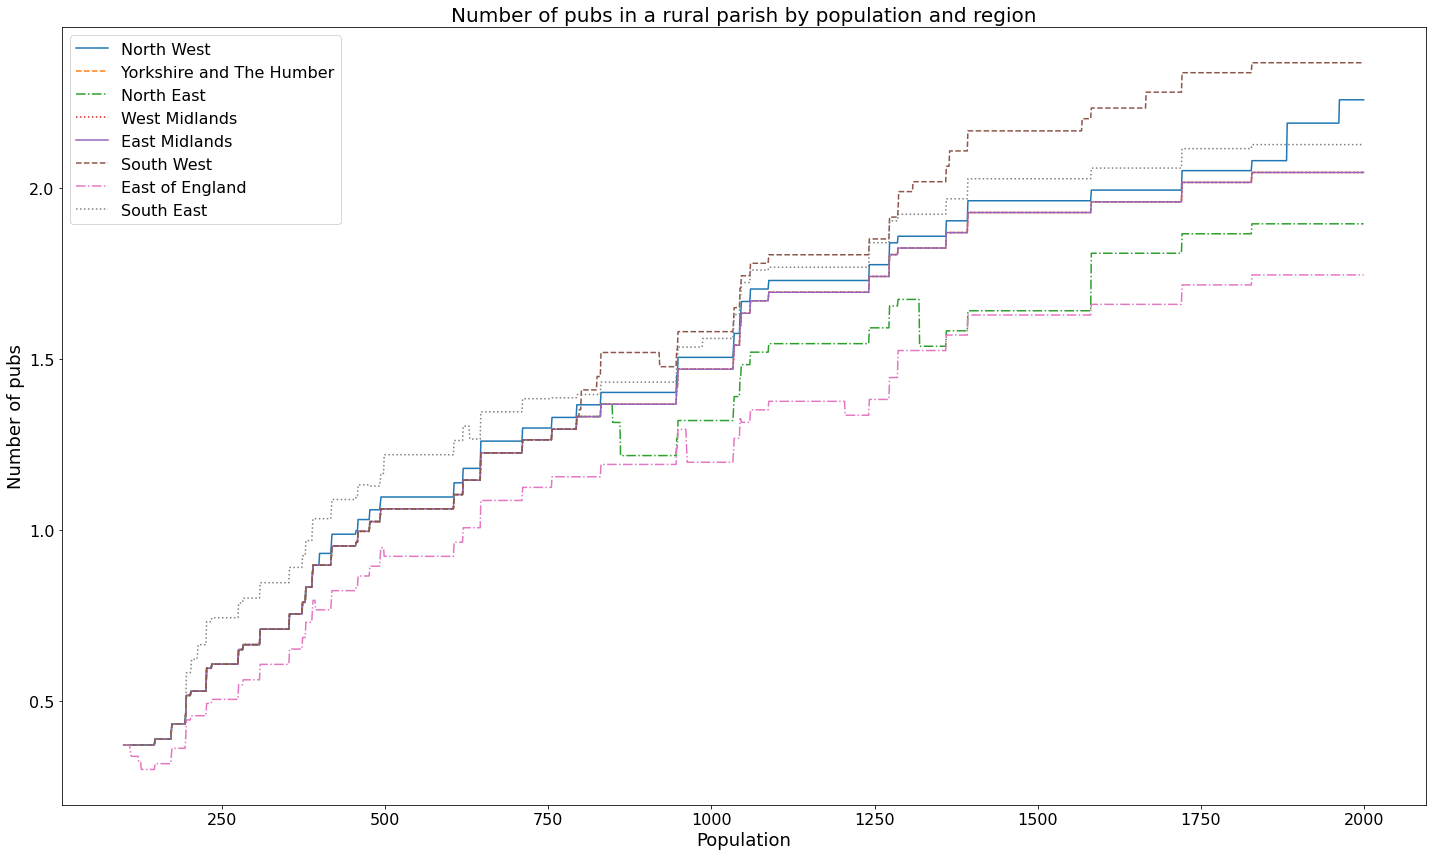

In [105]:
fig, ax = plt.subplots(figsize=(20,12))
ls = ['-', '--', '-.', ':']
i = 0
for region, dicty in predictions.items():
    x = dicty.keys()
    y = dicty.values()
    plt.plot(x, y, label=region, ls=ls[i%len(ls)])
    i += 1
    
plt.title('Number of pubs in a rural parish by population and region', fontsize=20)
plt.xlabel('Population', fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel('Number of pubs', fontsize=18)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.tight_layout()
plt.savefig('../results/num_pubs_by_region_gb.png')
plt.show()

## Within region comparisons

In [106]:
print("Yes")

Yes


In [113]:
def transform_pop(x):
    X = np.array([x])
    X = np.concatenate((X, np.log(X), np.sqrt(X))).reshape(1,-1)
    return X

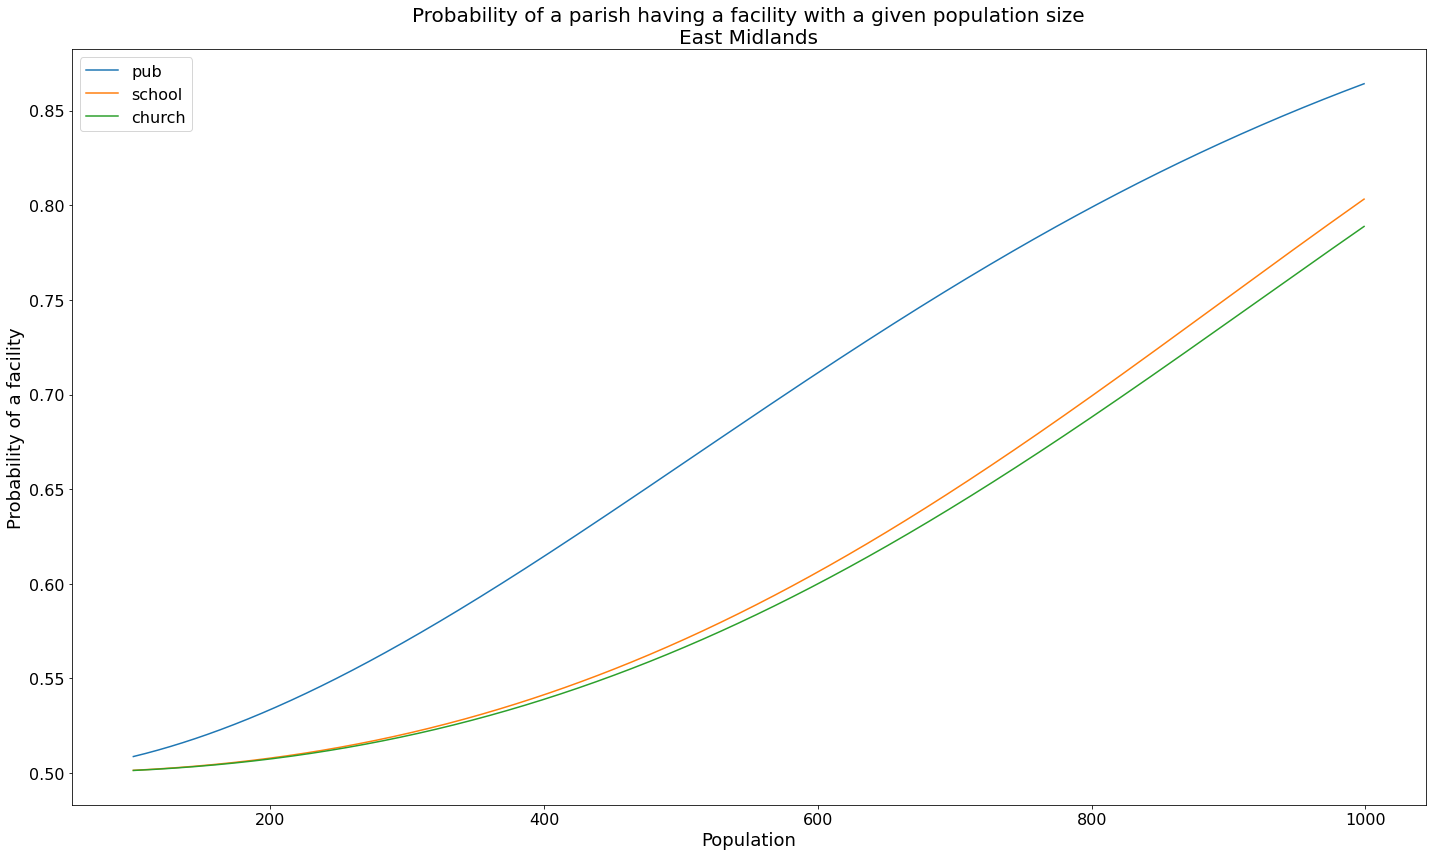

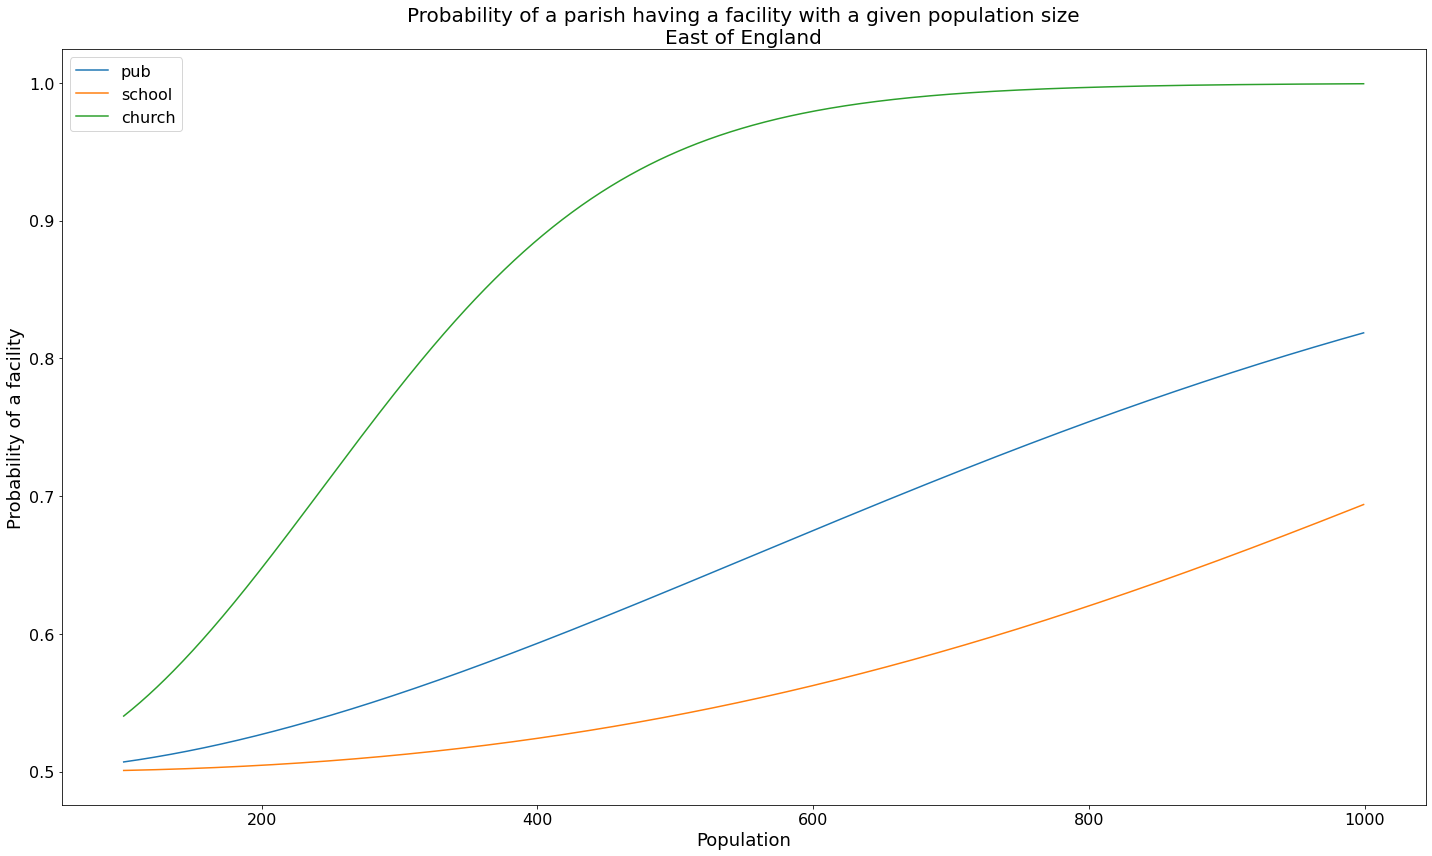

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


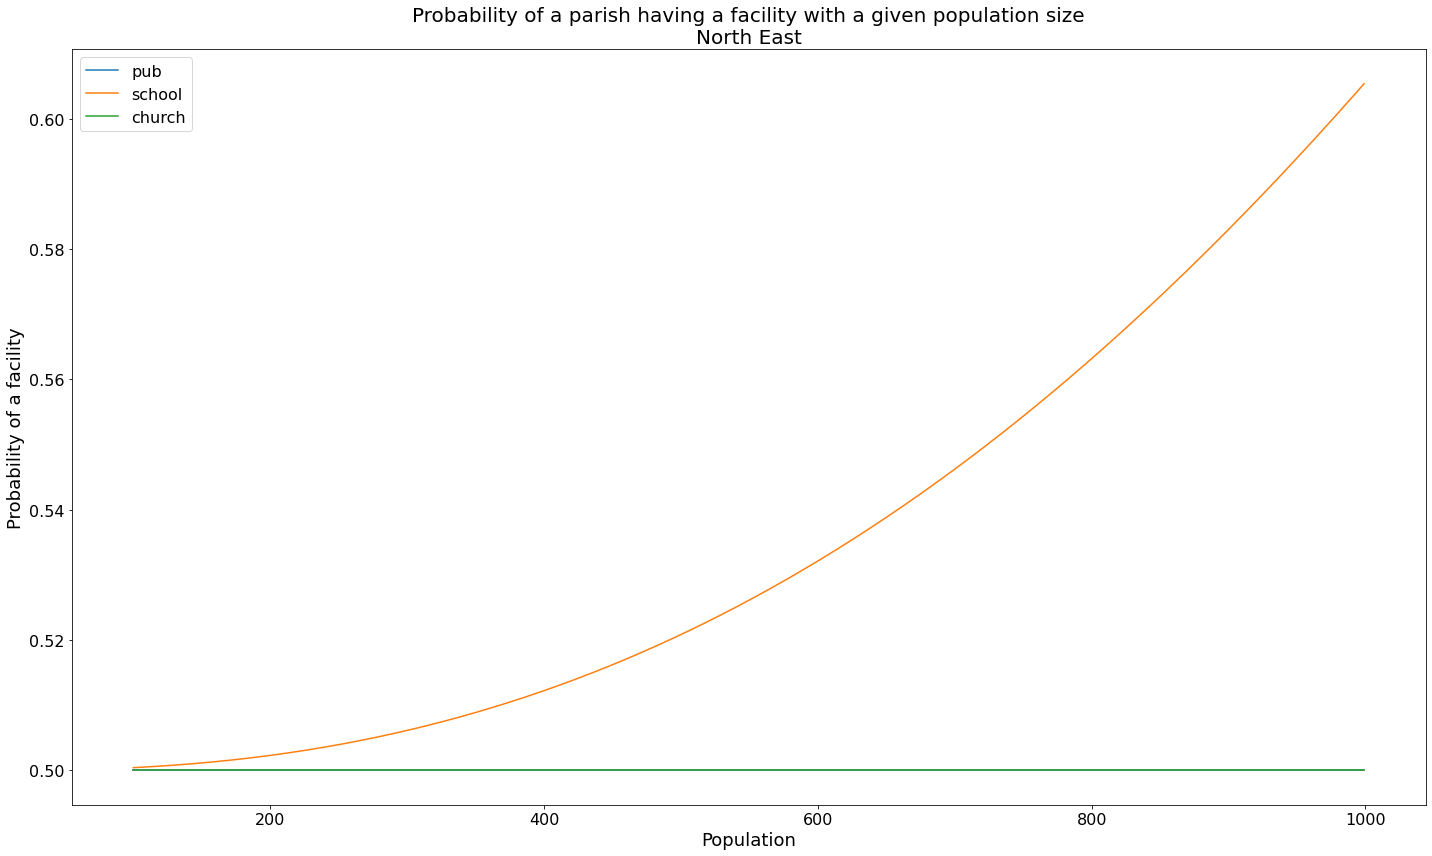

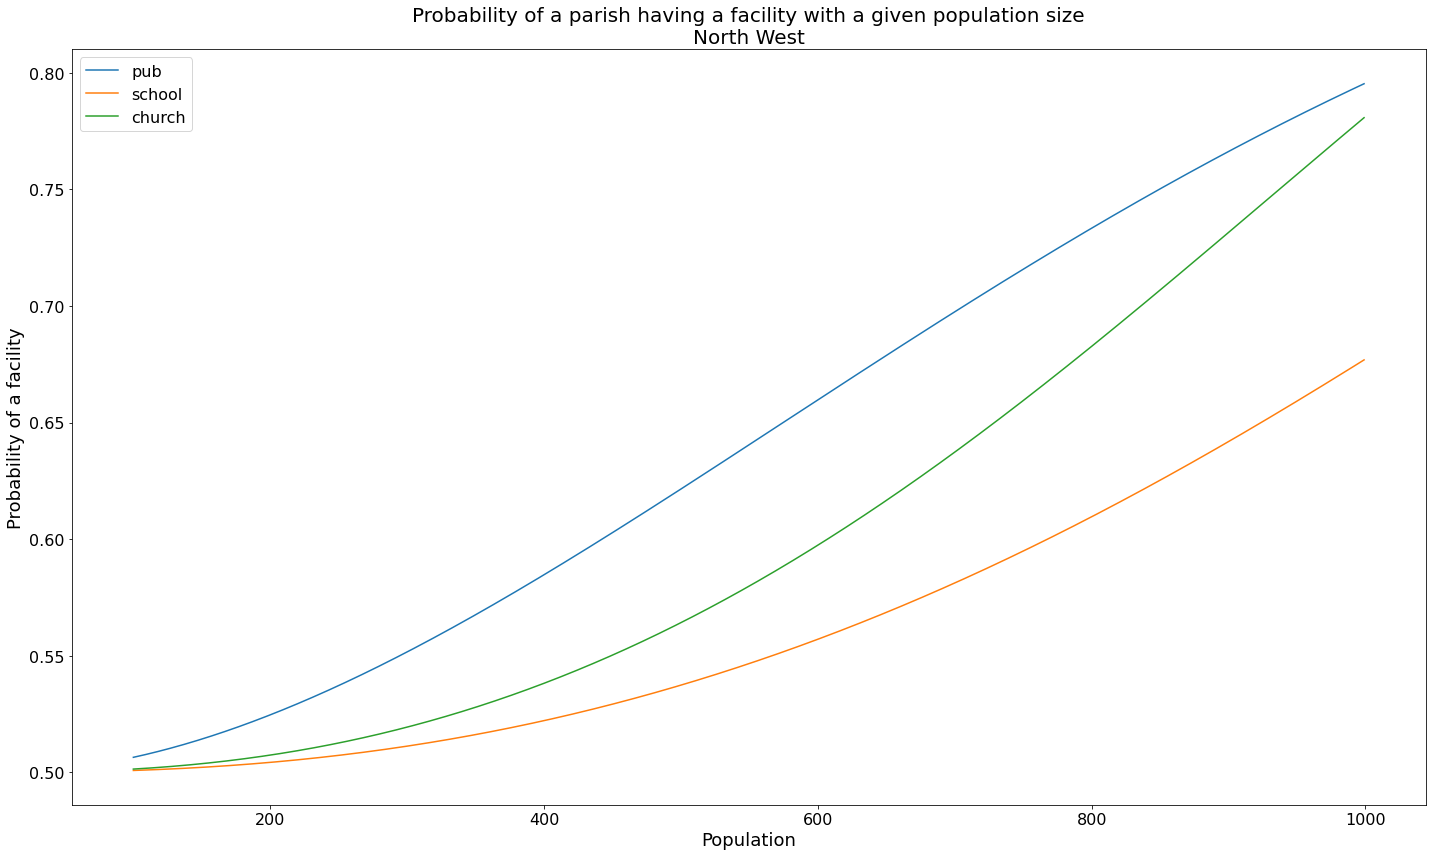

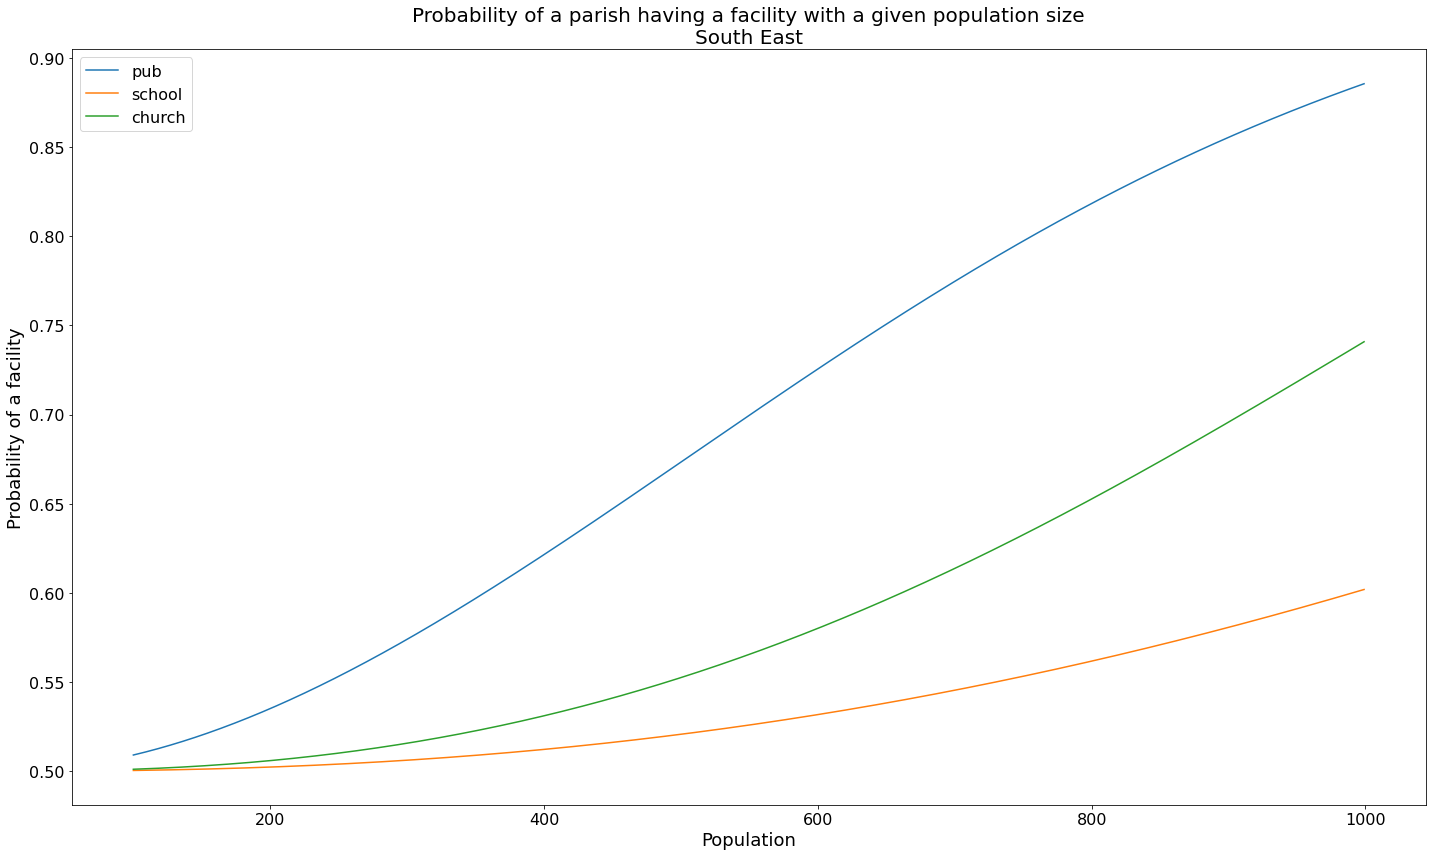

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


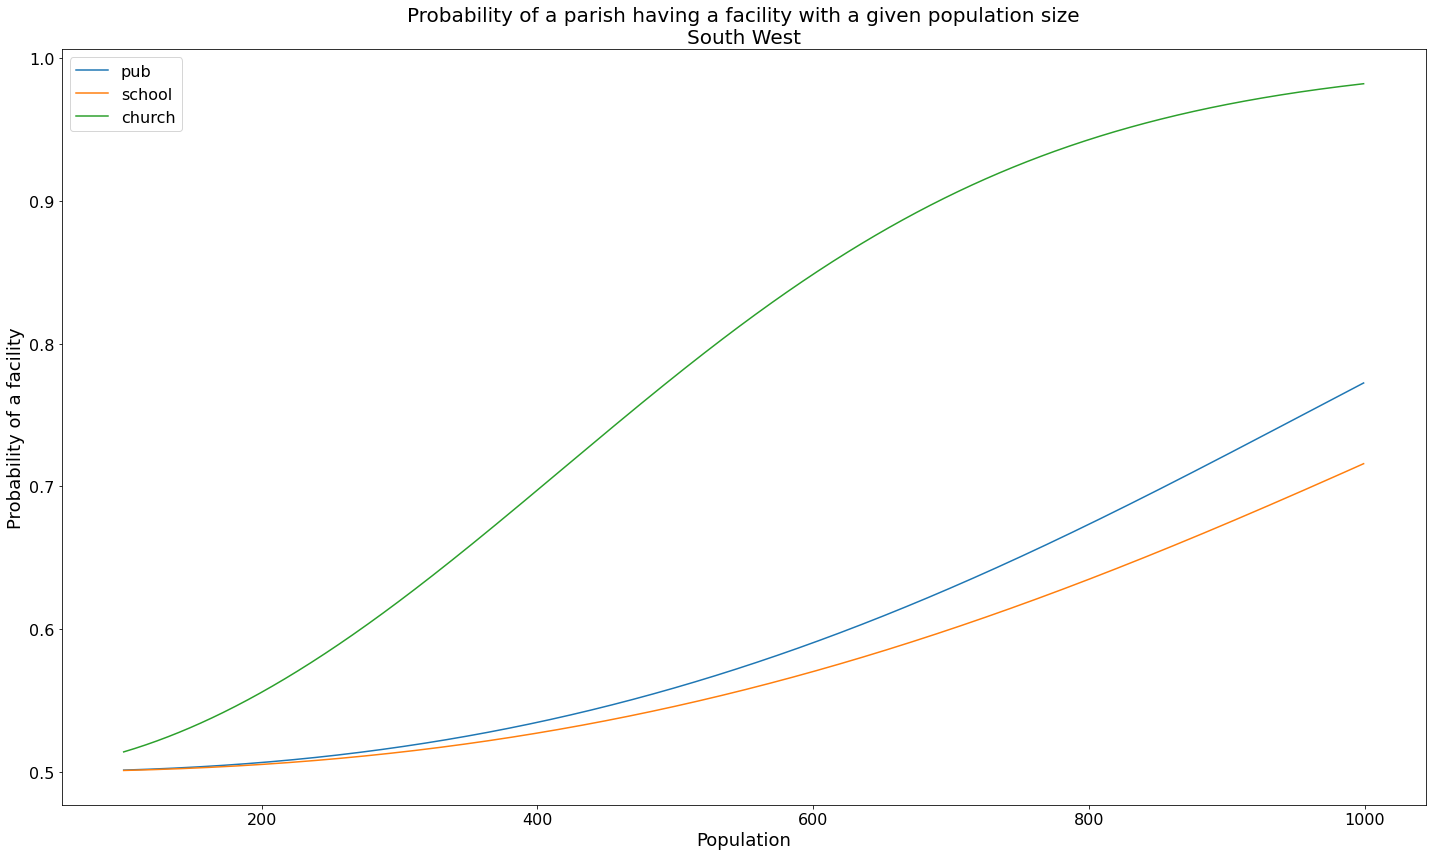

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


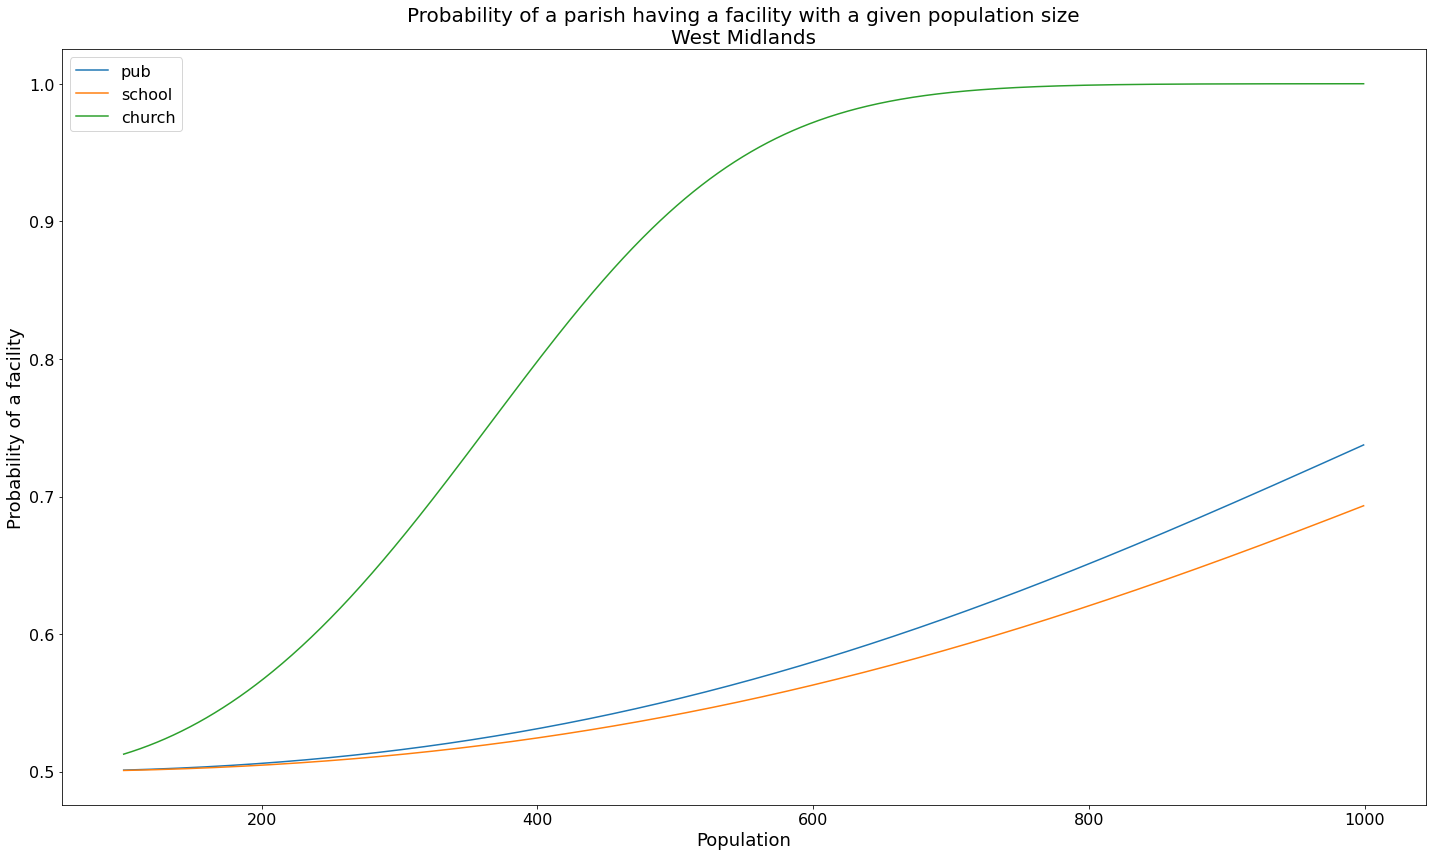

/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


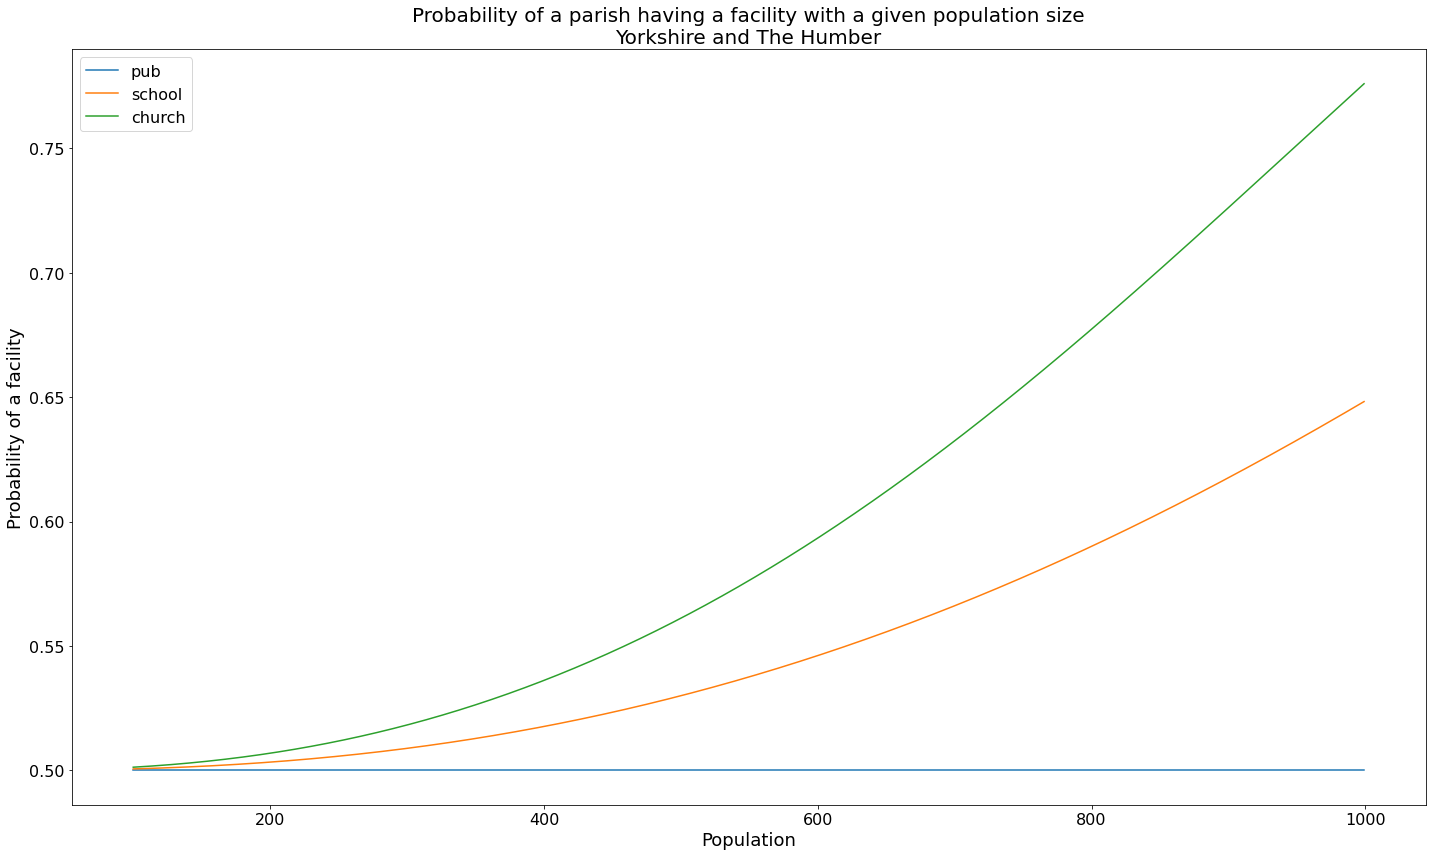

In [120]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.tree import plot_tree

smaller = parish_data[parish_data.rural_label == 'Rural']

for region, frame in smaller.groupby(['RGN22NM']):
    fig, ax = plt.subplots(figsize=(20,12))
    X = frame[['population']]
    X = pd.concat([X, np.log(X), np.sqrt(X)], axis=1).values
    interaction = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)
    X_interaction = interaction.fit_transform(X)
    has_pub_feature = frame.pub.apply(lambda x: 1 if x > 0 else 0)
    has_school_feature = frame.school.apply(lambda x: 1 if x > 0 else 0)
    has_place_of_worship_feature = frame.place_of_worship.apply(lambda x: 1 if x > 0 else 0)

    model = LogisticRegression()  # Set the maximum depth of the tree
    model.fit(X_interaction, has_pub_feature)
    
    
    pub_predictions = [model.predict_proba(interaction.transform(transform_pop(i)))[0][1] for i in range(100,1000)]
    model.fit(X_interaction, has_school_feature)
    school_predictions = [model.predict_proba(interaction.transform(transform_pop(i)))[0][1] for i in range(100,1000)]
    model.fit(X_interaction, has_place_of_worship_feature)
    church_predictions = [model.predict_proba(interaction.transform(transform_pop(i)))[0][1] for i in range(100,1000)]
    
    x = np.arange(100,1000)
    plt.plot(x, pub_predictions, label='pub')
    plt.plot(x, school_predictions, label='school')
    plt.plot(x, church_predictions, label='church')
    
    plt.xlabel('Population', fontsize=18)
    plt.xticks(fontsize=16)
    plt.ylabel('Probability of a facility', fontsize=18)
    plt.yticks(fontsize=16)
    plt.legend(fontsize=16)
    plt.title("Probability of a parish having a facility with a given population size\n{0}".format(region), fontsize=20)
    plt.tight_layout()
    plt.savefig('../results/prob_facility_lr_{0}.png'.format(region))
    plt.show()
    

PAR22CD                 PAR22NM          RGN22NM  population  \
6     E04000010           Dunham Massey       North West         470   
8     E04000012               Warburton       North West         342   
17    E04000022     Billinge Chapel End       North West        5827   
24    E04000030           Ince Blundell       North West         462   
31    E04000037                Hightown       North West        2018   
...         ...                     ...              ...         ...   
9359  E04013153                Elsenham  East of England        3570   
9360  E04013154       Great Chesterford  East of England        1775   
9361  E04013155                  Henham  East of England        1371   
9362  E04013156      Little Chesterford  East of England         213   
9363  E04013157  Yeovilton and District       South West        1488   

              area                                       amenity_list  \
6     9.550626e+06  {'parking': 12, 'pub': 3, 'telephone': 1, 'pos...   
8     7.960080e+06  {'post_box': 2, 'parking': 1, 'grave_yard': 2,...   
17    7.349949e+06  {'school': 4, 'pub': 6, 'parking': 14, 'librar...   
24    9.309675e+06  {'community_centre': 1, 'place_of_worship': 1,...   
31    3.095659e+06  {'place_of_worship': 1, 'bench': 1, 'post_box'...   
...            ...                                                ...   
9359  8.623082e+06  {'parking': 8, 'doctors': 1, 'parking_space': ...   
9360  1.146116e+07  {'school': 1, 'place_of_worship': 2, 'post_box...   
9361  1.449240e+07  {'events_venue': 1, 'car_rental': 1, 'post_box...   
9362  6.166580e+06  {'post_box': 3, 'parking': 16, 'atm': 1, 'benc...   
9363  2.279448e+07  {'post_box': 6, 'fast_food': 1, 'parking': 53,...   

     rural_label  pub  school  place_of_worship  population_weighted_imd  \
6          Rural    3       0                 1             22793.000000   
8          Rural    1       0                 1             22793.000000   
17         Rural    6       4                 2             20278.382186   
24         Rural    0       0                 1             16806.000000   
31         Rural    0       0                 1             26895.000000   
...          ...  ...     ...               ...                      ...   
9359       Rural    1       2                 1             29911.082353   
9360       Rural    2       1                 2             30967.000000   
9361       Rural    1       1                 2             31238.000000   
9362       Rural    0       0                 1             30967.000000   
9363       Rural    3       0                 4             18785.000000   

      area_weighted_imd  last_year_median_price  last_year_total_sales  \
6          22793.000000                472000.0                    3.0   
8          22793.000000                385000.0                    1.0   
17         18905.542543                220000.0                   75.0   
24         16806.000000                270000.0                   12.0   
31         26895.000000                301000.0                   27.0   
...                 ...                     ...                    ...   
9359       31071.226923                410000.0                   55.0   
9360       30967.000000                435000.0                   33.0   
9361       31238.000000                828500.0                   13.0   
9362       30967.000000               1150000.0                    1.0   
9363       18785.000000                606000.0                   16.0   

      three_year_median_price  three_year_total_sales  five_year_median_price  \
6                    507500.0                    20.0                472000.0   
8                    588000.0                    25.0                549950.0   
17                   179500.0                   287.0                175000.0   
24                   249950.0                    37.0                265000.0   
31                   271119.0                   141.0      

In [111]:
a = np.array([25])
print(a)

[25]


In [112]:
b = pd.concat([a, np.log(a), np.sqrt(a)], axis=1)
print(b)

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

In [110]:
transform_pop(25)

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

In [125]:
has_pub_feature = smaller.pub.apply(lambda x: 1 if x > 0 else 0)
has_school_feature = smaller.school.apply(lambda x: 1 if x > 0 else 0)
has_place_of_worship_feature = smaller.place_of_worship.apply(lambda x: 1 if x > 0 else 0)

smaller.head()

PAR22CD              PAR22NM     RGN22NM  population          area  \
6   E04000010        Dunham Massey  North West         470  9.550626e+06   
8   E04000012            Warburton  North West         342  7.960080e+06   
17  E04000022  Billinge Chapel End  North West        5827  7.349949e+06   
24  E04000030        Ince Blundell  North West         462  9.309675e+06   
31  E04000037             Hightown  North West        2018  3.095659e+06   

                                         amenity_list rural_label  pub  \
6   {'parking': 12, 'pub': 3, 'telephone': 1, 'pos...       Rural    3   
8   {'post_box': 2, 'parking': 1, 'grave_yard': 2,...       Rural    1   
17  {'school': 4, 'pub': 6, 'parking': 14, 'librar...       Rural    6   
24  {'community_centre': 1, 'place_of_worship': 1,...       Rural    0   
31  {'place_of_worship': 1, 'bench': 1, 'post_box'...       Rural    0   

    school  place_of_worship  population_weighted_imd  area_weighted_imd  \
6        0                 1             22793.000000       22793.000000   
8        0                 1             22793.000000       22793.000000   
17       4                 2             20278.382186       18905.542543   
24       0                 1             16806.000000       16806.000000   
31       0                 1             26895.000000       26895.000000   

    last_year_median_price  last_year_total_sales  three_year_median_price  \
6                 472000.0                    3.0                 507500.0   
8                 385000.0                    1.0                 588000.0   
17                220000.0                   75.0                 179500.0   
24                270000.0                   12.0                 249950.0   
31                301000.0                   27.0                 271119.0   

    three_year_total_sales  five_year_median_price  five_year_total_sales  \
6                     20.0                472000.0                   29.0   
8                     25.0                549950.0                   31.0   
17                   287.0                175000.0                  452.0   
24                    37.0                265000.0                   47.0   
31                   141.0                273000.0                  221.0   

    sales_last_year_per_population  
6                         0.006383  
8                         0.002924  
17                        0.012871  
24                        0.025974  
31                        0.013380

In [133]:
def round_pop(x):
    if x <= 200:
        return np.round(x/30)*30
    if x <= 500:
        return np.round(x/50)*50
    if x <= 1500:
        return 100*np.round(x/100)
    return 1000*np.round(x/1000)

In [135]:
smaller.loc[:, 'rounded_population'] = smaller.population.apply(round_pop)
smaller['has_pub_feature'] = smaller.pub.apply(lambda x: 1 if x > 0 else 0)
smaller['has_school_feature'] = smaller.school.apply(lambda x: 1 if x > 0 else 0)
smaller['has_place_of_worship_feature'] = smaller.place_of_worship.apply(lambda x: 1 if x > 0 else 0)
smaller.head()

/var/folders/zs/1hvc18dn7v94z77k1xy7g90c0000gn/T/ipykernel_89548/547344651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smaller.loc[:, 'rounded_population'] = smaller.population.apply(round_pop)
/var/folders/zs/1hvc18dn7v94z77k1xy7g90c0000gn/T/ipykernel_89548/547344651.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smaller['has_pub_feature'] = smaller.pub.apply(lambda x: 1 if x > 0 else 0)
/var/folders/zs/1hvc18dn7v94z77k1xy7g90c0000gn/T/ipykernel_89548/547344651.py:3: SettingWithCopyWarning: 
A

PAR22CD              PAR22NM     RGN22NM  population          area  \
6   E04000010        Dunham Massey  North West         470  9.550626e+06   
8   E04000012            Warburton  North West         342  7.960080e+06   
17  E04000022  Billinge Chapel End  North West        5827  7.349949e+06   
24  E04000030        Ince Blundell  North West         462  9.309675e+06   
31  E04000037             Hightown  North West        2018  3.095659e+06   

                                         amenity_list rural_label  pub  \
6   {'parking': 12, 'pub': 3, 'telephone': 1, 'pos...       Rural    3   
8   {'post_box': 2, 'parking': 1, 'grave_yard': 2,...       Rural    1   
17  {'school': 4, 'pub': 6, 'parking': 14, 'librar...       Rural    6   
24  {'community_centre': 1, 'place_of_worship': 1,...       Rural    0   
31  {'place_of_worship': 1, 'bench': 1, 'post_box'...       Rural    0   

    school  place_of_worship  ...  last_year_total_sales  \
6        0                 1  ...                    3.0   
8        0                 1  ...                    1.0   
17       4                 2  ...                   75.0   
24       0                 1  ...                   12.0   
31       0                 1  ...                   27.0   

    three_year_median_price  three_year_total_sales  five_year_median_price  \
6                  507500.0                    20.0                472000.0   
8                  588000.0                    25.0                549950.0   
17                 179500.0                   287.0                175000.0   
24                 249950.0                    37.0                265000.0   
31                 271119.0                   141.0                273000.0   

    five_year_total_sales  sales_last_year_per_population  rounded_population  \
6                    29.0                        0.006383               450.0   
8                    31.0                        0.002924               350.0   
17                  452.0                        0.012871              6000.0   
24                   47.0                        0.025974               450.0   
31                  221.0                        0.013380              2000.0   

    has_pub_feature  has_school_feature  has_place_of_worship_feature  
6                 1                   0                             1  
8                 1                   0                             1  
17                1                   1                             1  
24                0                   0                             1  
31                0                   0                             1  

[5 rows x 23 columns]

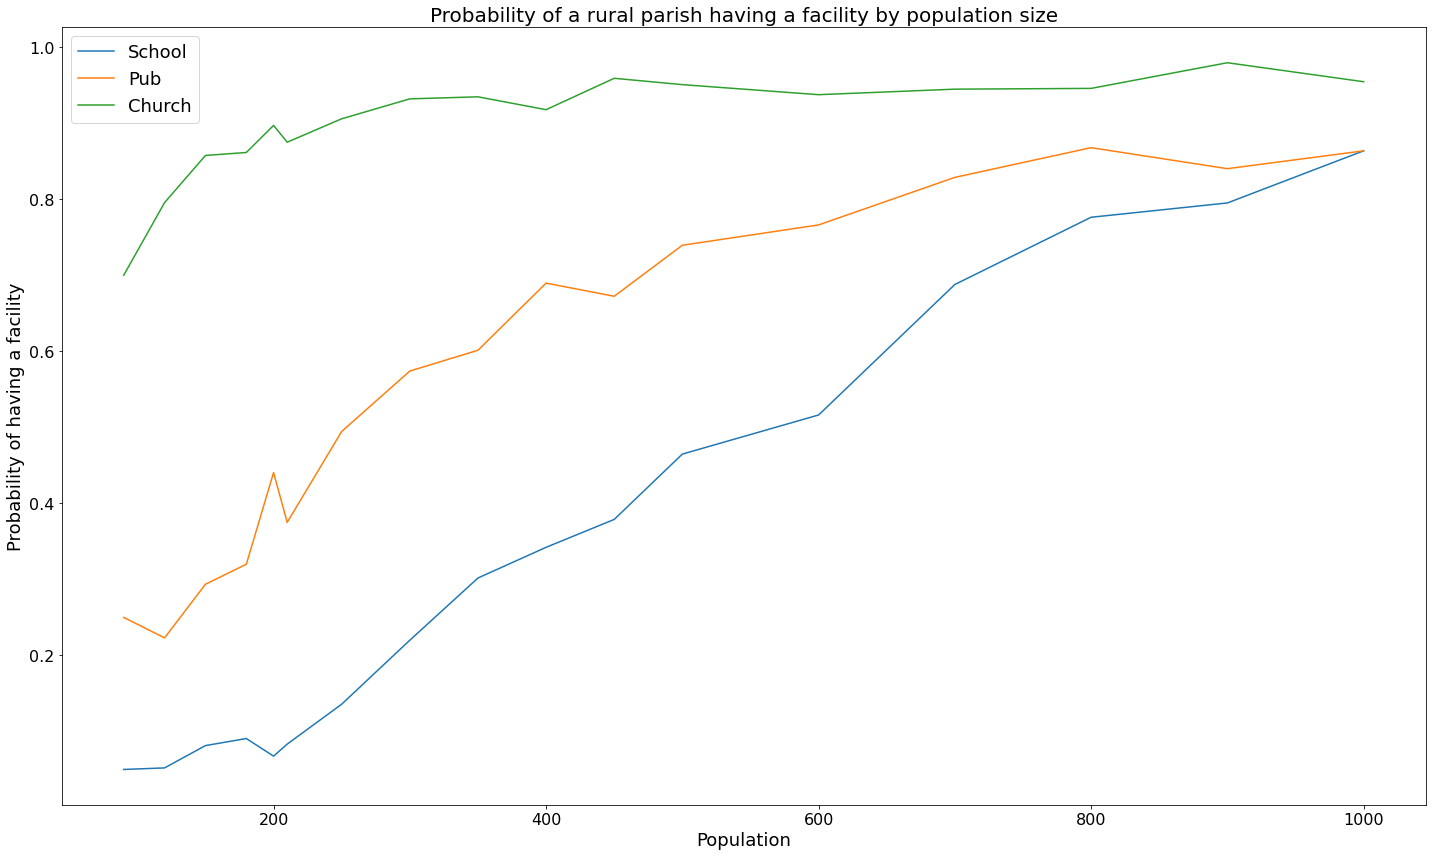

In [146]:
fig, ax = plt.subplots(figsize=(20,12))
smaller[smaller.rounded_population <= 1000].groupby(['rounded_population'])['has_school_feature'].agg('mean').plot(ax=ax, label='School')
smaller[smaller.rounded_population <= 1000].groupby(['rounded_population'])['has_pub_feature'].agg('mean').plot(ax=ax, label='Pub')
smaller[smaller.rounded_population <= 1000].groupby(['rounded_population'])['has_place_of_worship_feature'].agg('mean').plot(ax=ax, label='Church')
plt.xlabel('Population', fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel('Probability of having a facility', fontsize=18)
plt.yticks(fontsize=16)
plt.legend(fontsize=18)
plt.title('Probability of a rural parish having a facility by population size', fontsize=20)
plt.tight_layout()
plt.savefig('../results/real_prob_facilities.png')
plt.show()